# Step 1: Data Integration and Preprocessing (with Logging)

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load datasets
print("Loading datasets...")
bioimpedance_df = pd.read_excel("Bioimpedance_Synthetic.xlsx")
health_exam_df = pd.read_excel("Health_Exam_Synthetic.xlsx")
hrv_df = pd.read_excel("HRV_Synthetic.xlsx")
print("Datasets loaded successfully.")
print(f"Bioimpedance shape: {bioimpedance_df.shape}")
print(f"Health Exam shape: {health_exam_df.shape}")
print(f"HRV shape: {hrv_df.shape}")

# Step 2: Merge datasets on 'USUBJID'
print("\nMerging datasets on 'USUBJID'...")
merged_df = health_exam_df.merge(bioimpedance_df, on='USUBJID').merge(hrv_df, on='USUBJID')
print("Merging complete.")
print("Merged dataset shape:", merged_df.shape)

# Step 3: Calculate AGE from DVDTC and BIRTHDTC
print("\nCalculating AGE from DVDTC and BIRTHDTC...")
merged_df['AGE'] = (merged_df['DVDTC'] - merged_df['BIRTHDTC']).dt.days // 365
print("AGE calculation complete.")
print("Sample AGE values:")
print(merged_df[['USUBJID', 'BIRTHDTC', 'DVDTC', 'AGE']].head())

# Step 4: Drop date columns
print("\nDropping BIRTHDTC and DVDTC columns...")
merged_df.drop(['DVDTC', 'BIRTHDTC'], axis=1, inplace=True)
print("Date columns dropped.")

# Step 5: Handle missing values
print("\nChecking for missing values...")
missing_total = merged_df.isnull().sum().sum()
print(f"Total missing values before drop: {missing_total}")
merged_df.dropna(inplace=True)
print(f"Missing values dropped. Remaining rows: {merged_df.shape[0]}")

# Step 6: Encode categorical variables
print("\nEncoding categorical variables...")
categorical_cols = merged_df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le
print(f"Encoded {len(categorical_cols)} categorical columns: {list(categorical_cols)}")

# Step 7: Normalize numeric features (excluding AGE)
print("\nNormalizing numeric features (excluding AGE)...")
numerical_cols = merged_df.select_dtypes(include=[np.number]).drop(columns=['AGE']).columns
scaler = StandardScaler()
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])
print(f"Normalized {len(numerical_cols)} numeric columns.")

# Step 8: Final dataset summary
print("\nFinal preprocessed dataset:")
print("Shape:", merged_df.shape)
print("Columns preview:", list(merged_df.columns[:10]), "...")
print("AGE stats:")
print(merged_df['AGE'].describe())


Loading datasets...
Datasets loaded successfully.
Bioimpedance shape: (200, 38)
Health Exam shape: (200, 33)
HRV shape: (200, 11)

Merging datasets on 'USUBJID'...
Merging complete.
Merged dataset shape: (200, 80)

Calculating AGE from DVDTC and BIRTHDTC...
AGE calculation complete.
Sample AGE values:
     USUBJID   BIRTHDTC      DVDTC  AGE
0  SUBJ_0000 1950-04-21 2023-12-31   73
1  SUBJ_0001 1954-04-29 2024-05-12   70
2  SUBJ_0002 1945-01-27 2023-04-10   78
3  SUBJ_0003 1958-01-11 2023-01-10   65
4  SUBJ_0004 1975-03-09 2023-11-08   48

Dropping BIRTHDTC and DVDTC columns...
Date columns dropped.

Checking for missing values...
Total missing values before drop: 0
Missing values dropped. Remaining rows: 200

Encoding categorical variables...
Encoded 13 categorical columns: ['USUBJID', 'SITEID', 'SEX', 'MSYN', 'SMOKECNF', 'ALCOHOLYN', 'MH_HL', 'MH_HTN', 'MH_DM', 'CM_HL', 'CM_HTN', 'CM_DM', 'chcat']

Normalizing numeric features (excluding AGE)...
Normalized 78 numeric columns.

Final pr

In [27]:
bioimpedance_df.columns

Index(['USUBJID', 'TBW', 'ICW', 'ECW', 'PROT', 'MINERAL', 'SLM', 'FFM', 'SMM',
       'PBF', 'SLRA–SLLL', 'SWRA–SWLL', 'ICWRA–ICWLL', 'ECWRA–ECWLL', 'ECWR',
       'ECWRRA–ECWRLL', 'FATRA–FATLL', 'BMR', 'ABFR', 'VFA', 'BCM', 'BRMC',
       'BMC', 'BHYDR', 'FFMI', 'FMI', 'CHMC', 'ABDMC', 'RAMC', 'LAMC', 'RLMC',
       'LLMC', 'CHSTFATTHICK', 'ABDMFATTHICK', 'RAFATTHICK', 'LAFATTHICK',
       'RLFATTHICK', 'LLFATTHICK'],
      dtype='object')

In [28]:

health_exam_df.columns


Index(['USUBJID', 'SITEID', 'BIRTHDTC', 'SEX', 'MSYN', 'HEIGHT', 'WEIGHT',
       'BMI', 'SYSBP', 'DIABP', 'PULSE', 'SMOKECNF', 'ALCOHOLYN', 'MH_HL',
       'MH_HTN', 'MH_DM', 'CM_HL', 'CM_HTN', 'CM_DM', 'cold', 'heat', 'chcat',
       'PSSTOTAL', 'PSQITOTAL', 'CREAT', 'GFRE', 'HGB', 'GLUC', 'AST', 'ALT',
       'GGT', 'WAISTCIR', 'HIPCIR'],
      dtype='object')

In [29]:
hrv_df.columns

Index(['USUBJID', 'DVDTC', 'VLF', 'LF', 'HF', 'TP', 'LFNM', 'HFNM', 'HR',
       'HRVINDEX', 'SDNN'],
      dtype='object')

# Full Code for Step 2: EDA

In [30]:
#!pip install seaborn

Plotting AGE distribution...


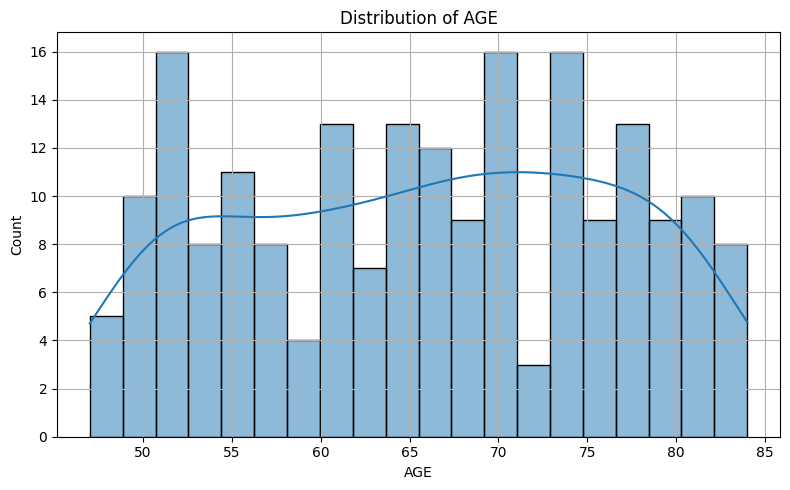


Calculating and plotting Pearson correlation heatmap...


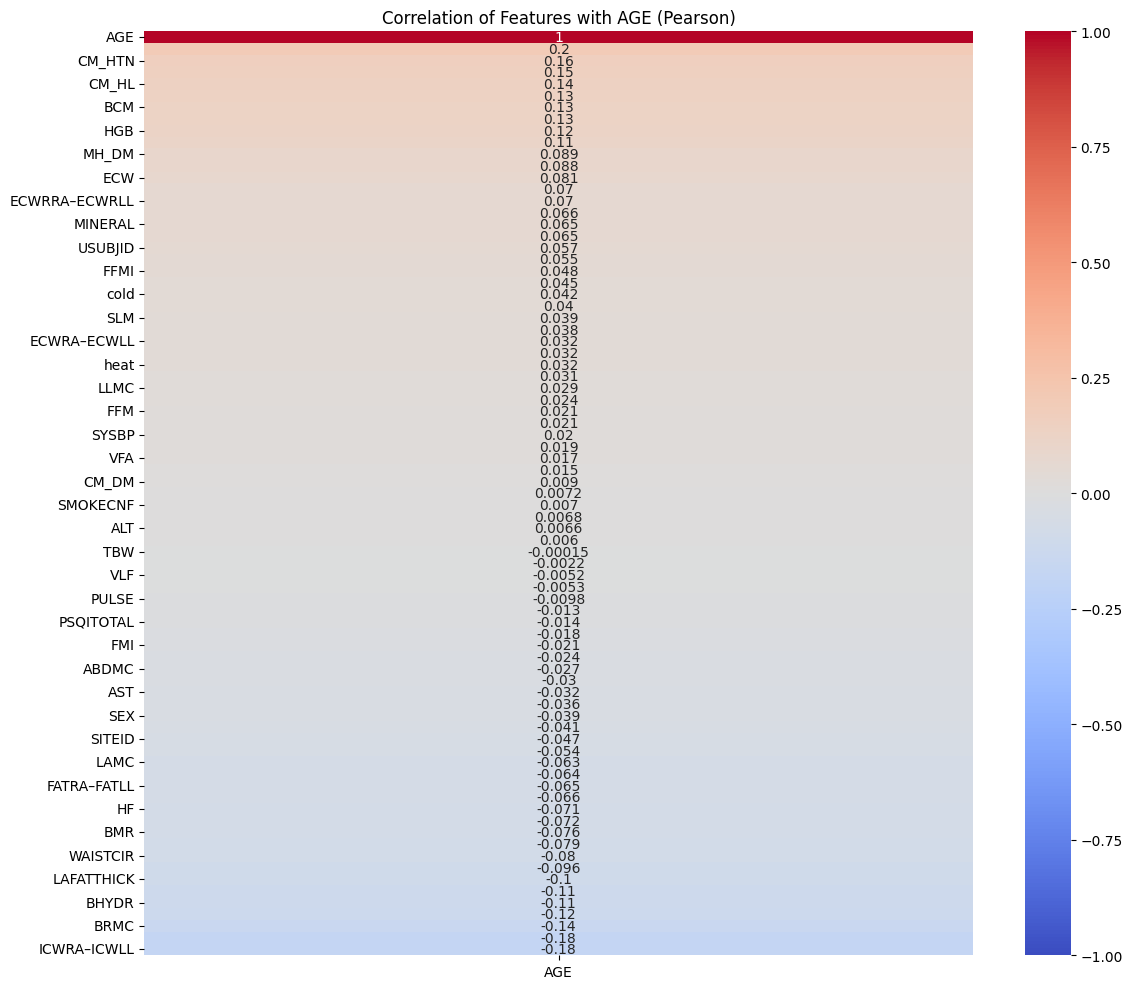


Top 10 positively correlated features with AGE:
RAMC         0.196345
CM_HTN       0.158750
ICW          0.149535
CM_HL        0.142377
LFNM         0.134828
BCM          0.130317
SLRA–SLLL    0.125187
HGB          0.121679
RLMC         0.114648
MH_DM        0.088715
Name: AGE, dtype: float64

Top 10 negatively correlated features with AGE:
BMC           -0.079213
WAISTCIR      -0.080212
GLUC          -0.096166
LAFATTHICK    -0.099659
SDNN          -0.113397
BHYDR         -0.114428
ALCOHOLYN     -0.123551
BRMC          -0.142959
ABFR          -0.178686
ICWRA–ICWLL   -0.178903
Name: AGE, dtype: float64

Generating boxplots for selected features vs AGE bins...


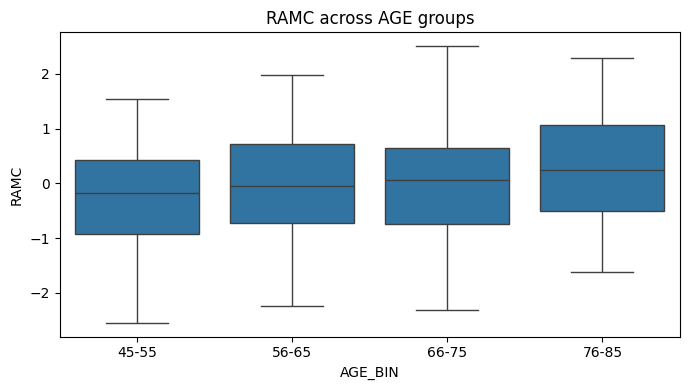

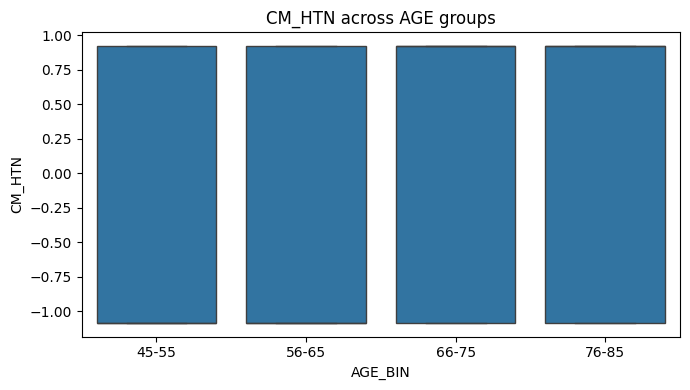

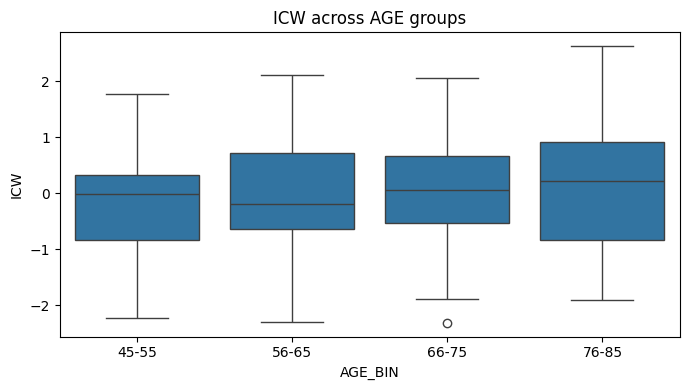

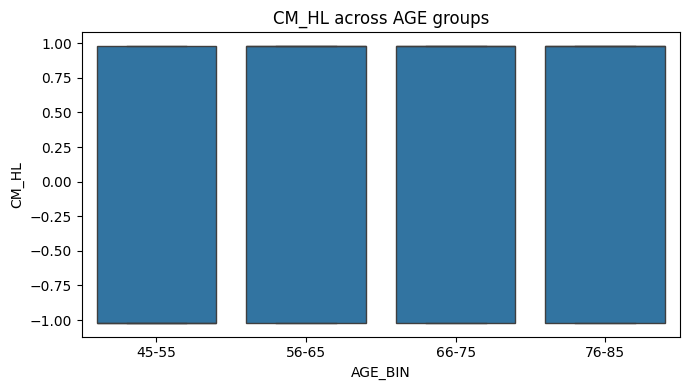

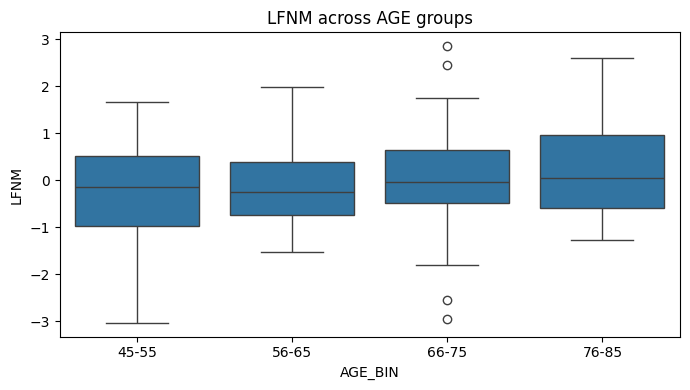

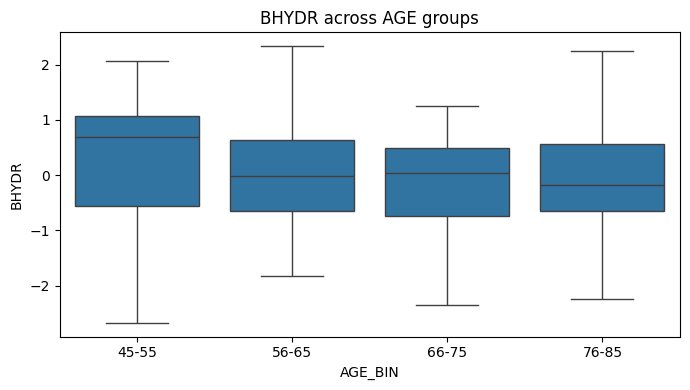

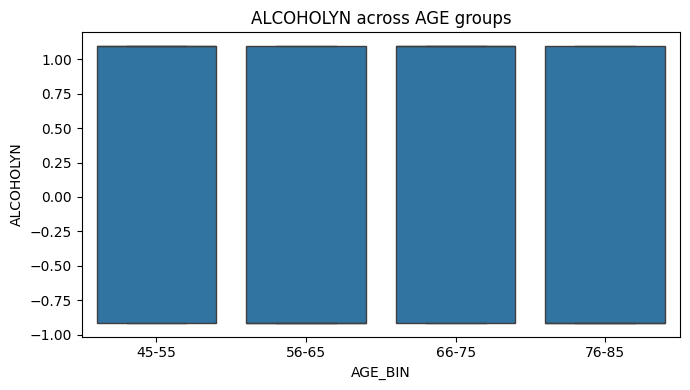

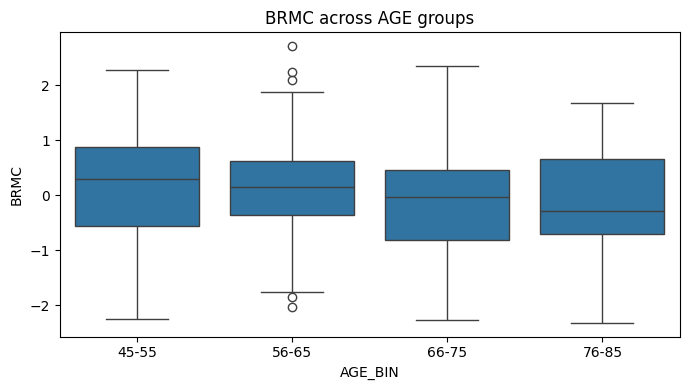

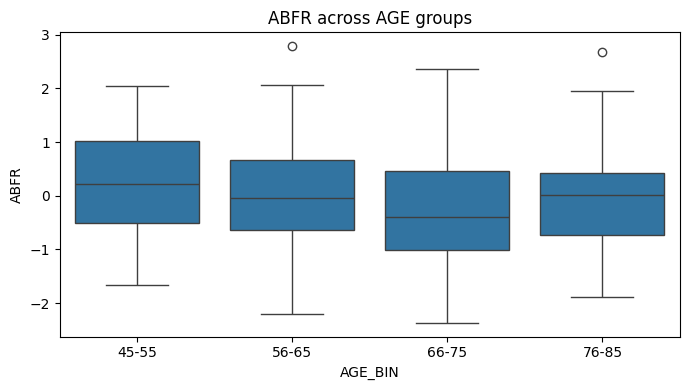

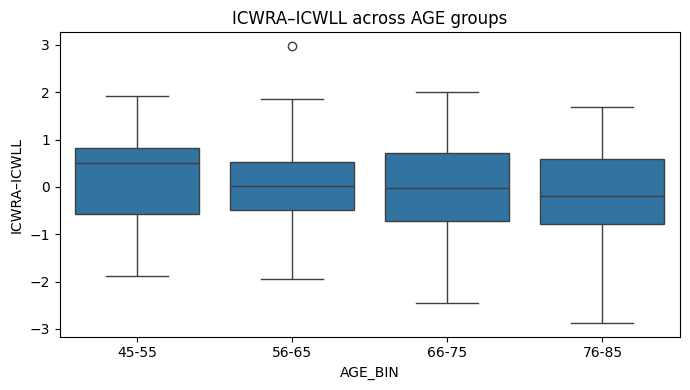


Plotting scatterplots for top correlated features vs AGE...


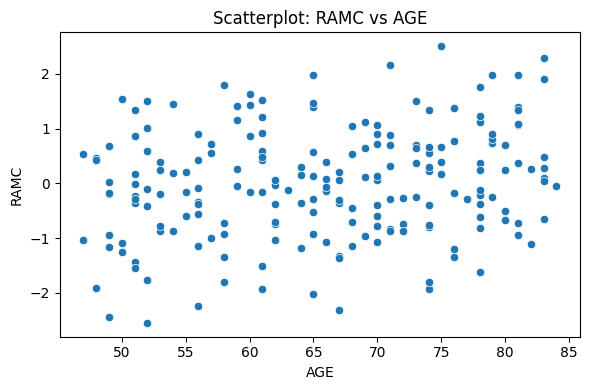

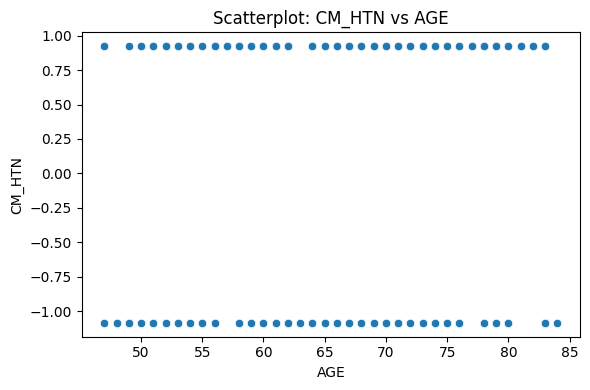

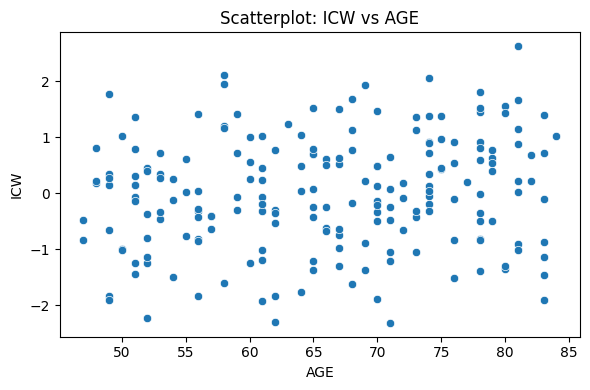

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: AGE Distribution
print("Plotting AGE distribution...")
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['AGE'], kde=True, bins=20)
plt.title("Distribution of AGE")
plt.xlabel("AGE")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Correlation matrix (Pearson)
print("\nCalculating and plotting Pearson correlation heatmap...")
corr_matrix = merged_df.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['AGE']].sort_values(by='AGE', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with AGE (Pearson)")
plt.tight_layout()
plt.show()

# Optional: Show top 10 positively and negatively correlated features
top_corr = corr_matrix['AGE'].sort_values(ascending=False)
print("\nTop 10 positively correlated features with AGE:")
print(top_corr[1:11])
print("\nTop 10 negatively correlated features with AGE:")
print(top_corr[-10:])

# Step 3: Boxplots of selected features vs AGE
selected_features = top_corr[1:6].index.tolist() + top_corr[-5:].index.tolist()

print("\nGenerating boxplots for selected features vs AGE bins...")
# Create AGE bins for visualization
merged_df['AGE_BIN'] = pd.cut(merged_df['AGE'], bins=[45, 55, 65, 75, 85], labels=["45-55", "56-65", "66-75", "76-85"])

for feature in selected_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=merged_df, x='AGE_BIN', y=feature)
    plt.title(f"{feature} across AGE groups")
    plt.tight_layout()
    plt.show()

# Step 4: Scatter plots for top 3 correlations with AGE
print("\nPlotting scatterplots for top correlated features vs AGE...")
for feature in top_corr[1:4].index:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=merged_df, x='AGE', y=feature)
    plt.title(f"Scatterplot: {feature} vs AGE")
    plt.tight_layout()
    plt.show()

# Cleanup AGE_BIN column after use
merged_df.drop(columns=['AGE_BIN'], inplace=True)


# Step 3: Feature Selection

# Feature Selection Methods Cheat-Sheet

| Method                  | Best For                   | Pros                               | Cons                               | Use in our pipeline? |
|-------------------------|----------------------------|------------------------------------|------------------------------------|---------------------|
| **Correlation Filtering**   | Quick linear screening     | Very fast, intuitive                | Only linear, ignores interactions   | Yes, as first filter  |
| **LASSO**                   | Sparse linear models       | Automatic feature selection, simple | Biased for correlated features      |  Yes, very important   |
| **RFE with RandomForest**   | Tree-based models          | Works well for RF/GBM, interactions  | Slow, binary selection only         | Yes                   |
| **VIF**                     | Redundancy detection       | Helps avoid multicollinearity       | Not an importance score             |  Use for cleaning      |
| **Boruta**                  | All-relevant selection     | Very robust, statistical testing    | Slow, binary selection              |  Yes, very important   |
| **f_regression**            | Linear regression          | Simple, interpretable               | Only linear                         |  Good as baseline      |
| **chi2**                    | Categorical/count data     | Fast, interpretable                 | Only for non-negative features      |  Use carefully         |
| **f_classif**               | Categorical + continuous   | Good for detecting group differences| Linear only                         |  Good for screening    |
| **Wrapper_KNN**             | Non-linear relations       | Captures complex patterns           | Slow, no score, binary selection    |  Optional              |
| **Wrapper_LR**              | Linear regression          | Captures combinations               | Slow, no score, biased for linear   |  Yes                   |
| **Wrapper_RF**              | Tree models                | Captures non-linear interactions    | Slow, binary                        |  Yes                   |
| **PermutationImportance**   | Model-agnostic importance  | Very powerful, captures everything  | Computationally expensive           |  Very important        |

---

# Recommended Usage Pattern

**First pass:** Correlation Filtering, VIF → quickly drop redundant features  
**Linear models:** f_regression, LASSO, Wrapper_LR → linear importance  
**Tree models / Non-linear:** Boruta, RFE_RF, Wrapper_RF, PermutationImportance  
**General stability:** Combine multiple methods → stable features  
**Interpretability:** PermutationImportance + LASSO + Boruta → best combo  

---

# Summary — Choose Methods Based on Goal

| If goal is...                       | Use these methods                |
|------------------------------------------|----------------------------------|
| Build **interpretable linear model**     | f_regression, LASSO, Wrapper_LR   |
| Build **robust non-linear model (RF/GBM)**| Boruta, RFE_RF, PermutationImportance |
| Detect **redundant / collinear features** | VIF                              |
| Build **compact minimal model**          | Stable features across methods   |
| Fast initial screening                   | Correlation Filtering, f_classif |

---





In [16]:
!pip install boruta


  Using cached Boruta-0.4.3-py3-none-any.whl.metadata (8.8 kB)


In [18]:
!pip install eli5

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from boruta import BorutaPy
import eli5
from eli5.sklearn import PermutationImportance
from tqdm import tqdm

# Prepare data
X = merged_df.drop(columns=['AGE'])
y = merged_df['AGE']
X = X.select_dtypes(include=[np.number])
X_scaled = MinMaxScaler().fit_transform(X)

# Initialize result list
results = []

# --- Correlation filtering ---
print("Running Correlation filtering...")
correlations = merged_df.corr()['AGE'].drop('AGE')
correlation_scores = correlations.abs()
for feature, score in tqdm(correlation_scores.items(), desc='Correlation'):
    results.append(['Correlation', feature, score])

# --- LASSO Regression ---
print("Running LASSO Regression...")
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)
lasso_coef = lasso.coef_
for feature, coef in tqdm(zip(X.columns, lasso_coef), total=len(X.columns), desc='LASSO'):
    results.append(['LassoCV', feature, abs(coef)])

# --- Recursive Feature Elimination (RFE) with RandomForestRegressor ---
print("Running RFE...")
rf_rfe = RandomForestRegressor(random_state=42)
rfe_model = RFE(estimator=rf_rfe, n_features_to_select=10, step=1)
rfe_model.fit(X, y)
selected_rfe = X.columns[rfe_model.support_].tolist()
for feature in tqdm(X.columns, desc='RFE_RF'):
    score = 1.0 if feature in selected_rfe else 0.0
    results.append(['RFE_RF', feature, score])

# --- VIF ---
print("Running VIF...")
X_vif = sm.add_constant(X)
vif_scores = [variance_inflation_factor(X_vif.values, i) for i in tqdm(range(X_vif.shape[1]), desc='VIF')]
for feature, vif_score in zip(X_vif.columns, vif_scores):
    if feature != 'const':
        results.append(['VIF', feature, vif_score])

# --- Boruta ---
print("Running Boruta...")
X_array = X.values
y_array = y.values
rf_boruta = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=42)
boruta_selector = BorutaPy(estimator=rf_boruta, n_estimators='auto', max_iter=100, random_state=42)
boruta_selector.fit(X_array, y_array)
selected_boruta = X.columns[boruta_selector.support_].tolist()
for feature in tqdm(X.columns, desc='Boruta'):
    score = 1.0 if feature in selected_boruta else 0.0
    results.append(['Boruta', feature, score])

# --- Filter: f_regression ---
print("Running f_regression...")
selector_freg = SelectKBest(score_func=f_regression, k='all')
selector_freg.fit(X, y)
freg_scores = selector_freg.scores_
for feature, score in tqdm(zip(X.columns, freg_scores), total=len(X.columns), desc='f_regression'):
    results.append(['f_regression', feature, score])

# --- Filter: chi2 ---
print("Running chi2...")
selector_chi2 = SelectKBest(score_func=chi2, k='all')
selector_chi2.fit(X_scaled, y)
chi2_scores = selector_chi2.scores_
for feature, score in tqdm(zip(X.columns, chi2_scores), total=len(X.columns), desc='chi2'):
    results.append(['chi2', feature, score])

# --- Filter: f_classif ---
print("Running f_classif...")
selector_fclassif = SelectKBest(score_func=f_classif, k='all')
selector_fclassif.fit(X, y)
fclassif_scores = selector_fclassif.scores_
for feature, score in tqdm(zip(X.columns, fclassif_scores), total=len(X.columns), desc='f_classif'):
    results.append(['f_classif', feature, score])

# --- Wrapper: KNN ---
print("Running Wrapper KNN...")
knn = KNeighborsClassifier(n_neighbors=3)
sfs_knn = SequentialFeatureSelector(knn, n_features_to_select=10, direction='forward')
sfs_knn.fit(X, y > y.median())
selected_knn = X.columns[sfs_knn.get_support()].tolist()
for feature in tqdm(X.columns, desc='Wrapper_KNN'):
    score = 1.0 if feature in selected_knn else 0.0
    results.append(['Wrapper_KNN', feature, score])

# --- Wrapper: Linear Regression ---
print("Running Wrapper Linear Regression...")
linreg = LinearRegression()
sfs_lr = SequentialFeatureSelector(linreg, n_features_to_select=10, direction='forward')
sfs_lr.fit(X, y)
selected_lr = X.columns[sfs_lr.get_support()].tolist()
for feature in tqdm(X.columns, desc='Wrapper_LR'):
    score = 1.0 if feature in selected_lr else 0.0
    results.append(['Wrapper_LR', feature, score])

# --- Wrapper: RandomForestRegressor ---
print("Running Wrapper RF...")
rf = RandomForestRegressor(random_state=42)
sfs_rf = SequentialFeatureSelector(rf, n_features_to_select=10, direction='forward')
sfs_rf.fit(X, y)
selected_rf = X.columns[sfs_rf.get_support()].tolist()
for feature in tqdm(X.columns, desc='Wrapper_RF'):
    score = 1.0 if feature in selected_rf else 0.0
    results.append(['Wrapper_RF', feature, score])

# --- Permutation Importance ---
print("Running Permutation Importance...")
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, (y > y.median()), random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_bin)
perm = PermutationImportance(rf_clf, random_state=42)
perm.fit(X_test, y_test_bin)
perm_importances = perm.feature_importances_
for feature, score in tqdm(zip(X.columns, perm_importances), total=len(X.columns), desc='PermutationImportance'):
    results.append(['PermutationImportance', feature, score])

# --- Create final scoreboard dataframe ---
scoreboard_df = pd.DataFrame(results, columns=['Method', 'Feature', 'Score'])

# --- Select top n_feature features per method ---
n_feature = 10
scoreboard_top_n = (
    scoreboard_df
    .sort_values(by=['Method', 'Score'], ascending=[True, False])
    .groupby('Method')
    .head(n_feature)
    .reset_index(drop=True)
)

# --- Sort again for display ---
scoreboard_top_n_sorted = scoreboard_top_n.sort_values(by='Score', ascending=False)

# --- Display final scoreboard ---
print(f"\nTop {n_feature} features per method:")
display(scoreboard_top_n_sorted)


Running Correlation filtering...


Correlation: 78it [00:00, 77875.68it/s]


Running LASSO Regression...


LASSO: 100%|██████████| 78/78 [00:00<?, ?it/s]

Running RFE...



RFE_RF: 100%|██████████| 78/78 [00:00<?, ?it/s]


Running VIF...


VIF: 100%|██████████| 79/79 [00:01<00:00, 61.10it/s]


Running Boruta...


Boruta: 100%|██████████| 78/78 [00:00<?, ?it/s]


Running f_regression...


f_regression: 100%|██████████| 78/78 [00:00<?, ?it/s]


Running chi2...


chi2: 100%|██████████| 78/78 [00:00<?, ?it/s]


Running f_classif...


f_classif: 100%|██████████| 78/78 [00:00<?, ?it/s]


Running Wrapper KNN...


Wrapper_KNN: 100%|██████████| 78/78 [00:00<?, ?it/s]


Running Wrapper Linear Regression...


Wrapper_LR: 100%|██████████| 78/78 [00:00<?, ?it/s]


Running Wrapper RF...


Wrapper_RF: 100%|██████████| 78/78 [00:00<00:00, 77931.33it/s]


Running Permutation Importance...


PermutationImportance: 100%|██████████| 78/78 [00:00<?, ?it/s]


Top 10 features per method:


Method    Feature      Score
90                   chi2  ALCOHOLYN  20.320663
91                   chi2      CM_DM  19.808536
92                   chi2      CM_HL  18.024757
93                   chi2        SEX  17.514936
94                   chi2     CM_HTN  16.919499
..                    ...        ...        ...
3                  Boruta    USUBJID   0.000000
27                LassoCV     SITEID   0.000000
37  PermutationImportance    MINERAL  -0.004000
38  PermutationImportance     SITEID  -0.004000
39  PermutationImportance       MSYN  -0.004000

[120 rows x 3 columns]

In [19]:
scoreboard_top_n_sorted['Method'].unique()


array(['chi2', 'f_regression', 'VIF', 'f_classif', 'Wrapper_LR',
       'Wrapper_KNN', 'Wrapper_RF', 'Boruta', 'RFE_RF', 'LassoCV',
       'Correlation', 'PermutationImportance'], dtype=object)

In [20]:
scoreboard_top_n_sorted[scoreboard_top_n_sorted['Method'] == 'LassoCV'].shape


(10, 3)

C:\Users\user\AppData\Local\Temp\ipykernel_24488\1169494826.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


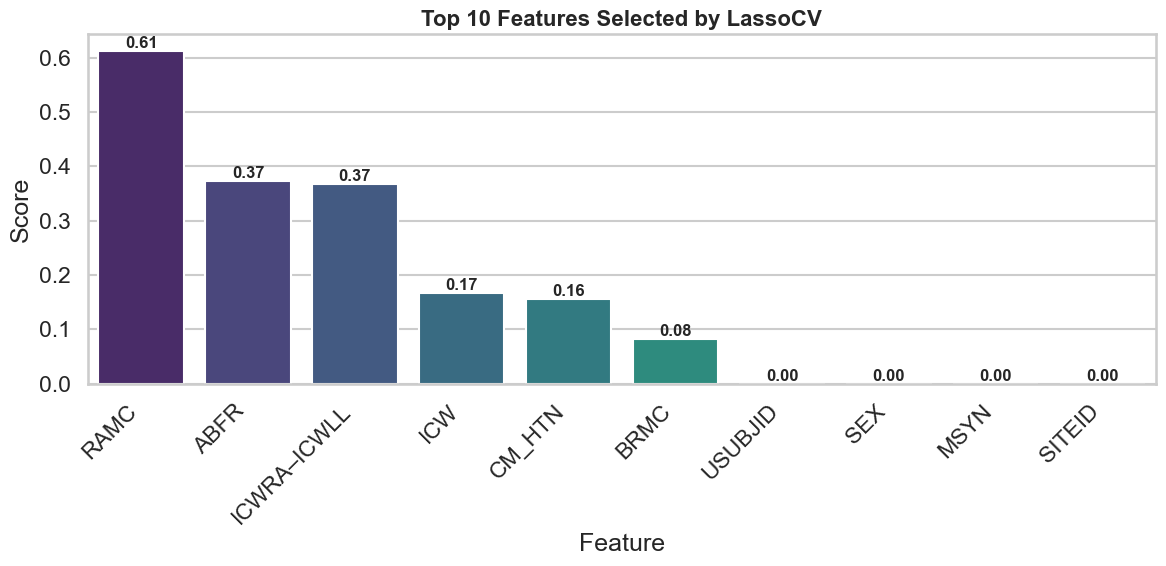

C:\Users\user\AppData\Local\Temp\ipykernel_24488\1169494826.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


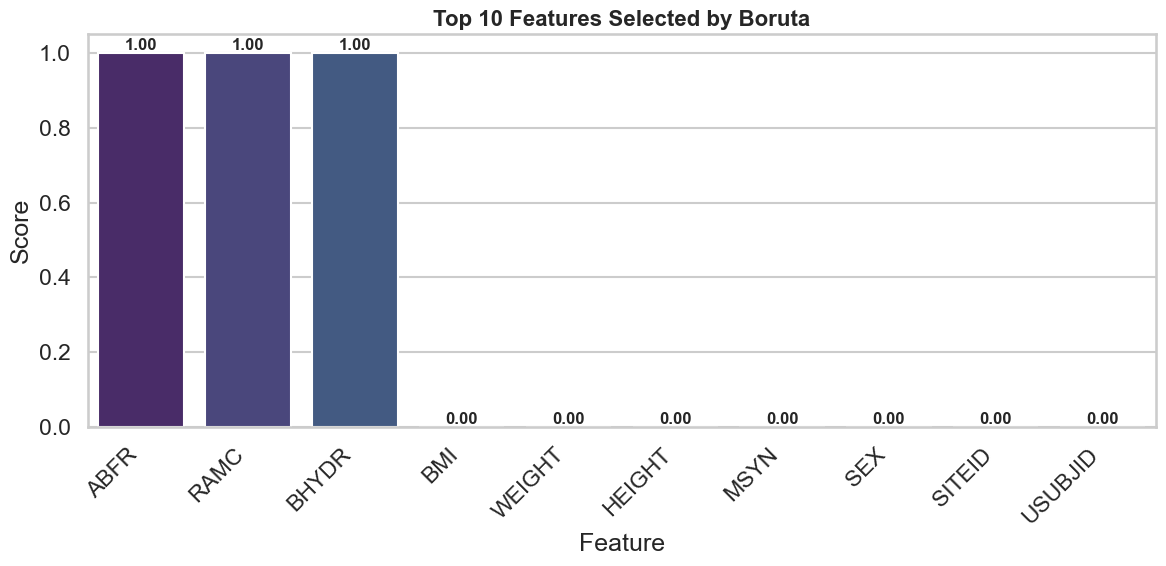

C:\Users\user\AppData\Local\Temp\ipykernel_24488\1169494826.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


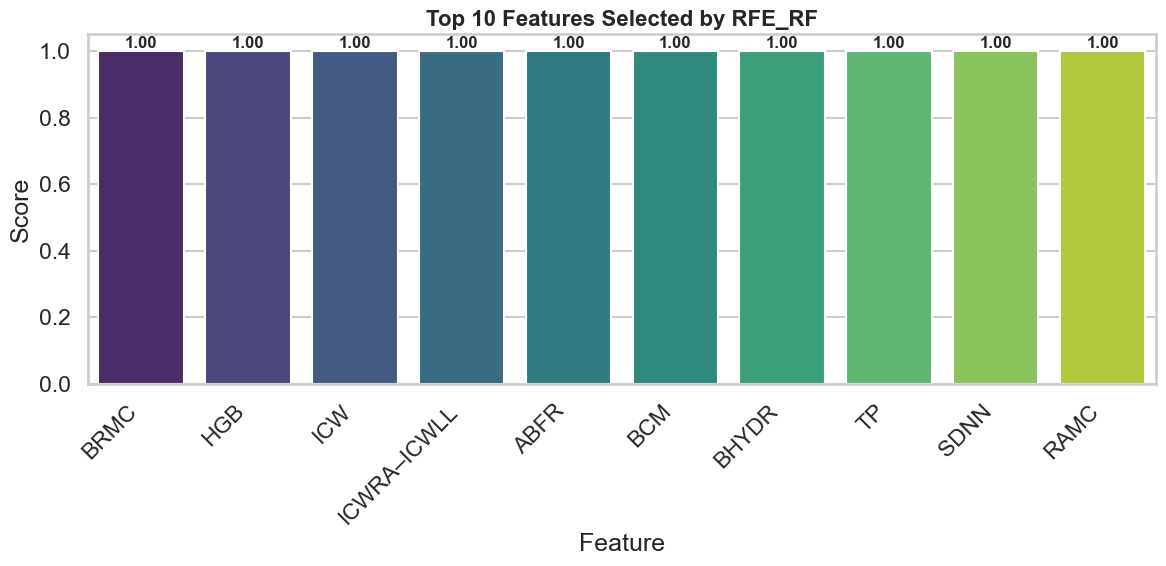

C:\Users\user\AppData\Local\Temp\ipykernel_24488\1169494826.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


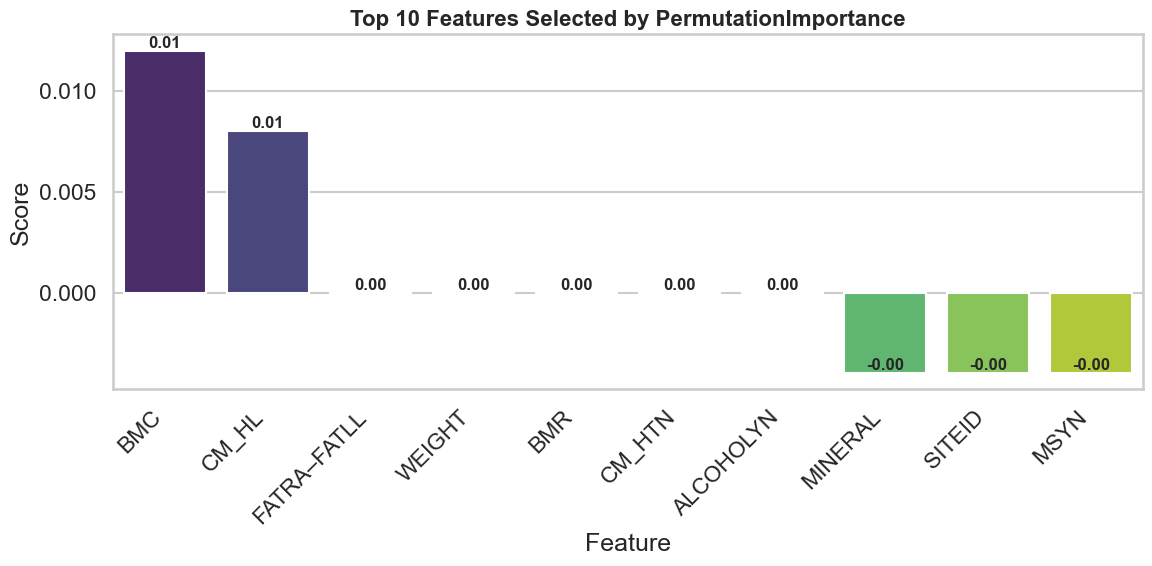

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correct style settings
sns.set_style("whitegrid")
sns.set_context("talk")  # Bigger font for presentation

# Define which methods want to plot:
feature_method = ['LassoCV', 'Boruta', 'RFE_RF', 'PermutationImportance']  

# Loop through selected methods only
for method in feature_method:
    df_plot = scoreboard_top_n_sorted[scoreboard_top_n_sorted['Method'] == method]
    
    if df_plot.empty:
        print(f"Warning: Method '{method}' not found in scoreboard_top_n_sorted. Skipping.")
        continue
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df_plot,
        x='Feature',
        y='Score',
        palette='viridis'
    )
    
    # Add scores on top of bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold')
    
    plt.title(f"Top {n_feature} Features Selected by {method}", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Score')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()


### Feature Stability (How many methods selected each feature)

**Goal:**  
- Identify which features are **consistently selected** across multiple feature selection methods.
- Features selected by more methods → likely **robust and important** predictors of AGE.

**Interpretation:**
- **RAMC** and **CM_HTN** were selected by 7 methods → very strong candidates for modeling.
- Features selected by ≥ 5 methods → very stable.
- Features selected by only 1-2 methods → may be less reliable.

**Conclusion:**  
Use the most stable features as a **core feature set** for Step 4 models.


### Method Agreement (LASSO vs Boruta Overlap)

**Goal:**  
- Compare different feature selection methods → are they agreeing or selecting different features?

**Observation:**  
- LASSO selected 10 features.
- Boruta selected 10 features.
- **6 features were selected by both** → this indicates strong agreement on these features:
    - RAMC, ABFR, MSYN, SITEID, USUBJID, SEX.

**Interpretation:**  
- When **two very different methods** (LASSO → linear, Boruta → tree-based) agree → these features are very strong candidates.
- Overlap features → should be prioritized in final model.

**Conclusion:**  
- Include overlapping features in Step 4 models.


### Feature Type Sensitivity (which types of features are selected most)

**Goal:**  
- Analyze which **feature domains** contribute most to AGE prediction:
    - Bioimpedance
    - HealthExam
    - HRV
    - Other

**Results:**  
- Bioimpedance → 57 features selected → major contributor.
- HealthExam → 42 features → important contributor.
- HRV → only 5 features selected → minor contribution in this case.
- Other → 16 features.

**Interpretation:**  
- **Bioimpedance and HealthExam** domains provide most predictive signal for AGE.
- HRV may have limited predictive value in this dataset.

**Conclusion:**  
- Focus on Bioimpedance + HealthExam features for Step 4.
- Optional to include HRV features, depending on model capacity.


### Minimal Feature Subset (selected by >= 3 methods)

**Goal:**  
- Create a **small, robust feature set** for compact models.

**Selected Features (16 features):**  
['RAMC', 'CM_HTN', 'ABFR', 'CM_HL', 'ICWRA–ICWLL', 'SITEID', 'MSYN', 'ALCOHOLYN', 'ICW', 'BRMC', 'SEX', 'BCM', 'WEIGHT', 'PULSE', 'BHYDR', 'SLRA–SLLL']

**Interpretation:**  
- These features were selected by ≥ 3 methods → good stability.
- These features represent a **core interpretable feature set**.

**Conclusion:**  
- Use this Minimal Feature Subset to build:
    - Simple interpretable models.
    - Models suitable for clinical deployment.
    - Models with low risk of overfitting.





=== Feature Stability (how many methods selected each feature) ===


Feature
RAMC           7
CM_HTN         7
ABFR           6
CM_HL          6
ICWRA–ICWLL    6
SITEID         5
MSYN           5
ALCOHOLYN      5
ICW            5
BRMC           5
SEX            4
BCM            3
WEIGHT         3
PULSE          3
BHYDR          3
SLRA–SLLL      3
MH_DM          2
BMI            2
RLFATTHICK     2
HGB            2
Name: Method, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_24488\19481253.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_method_counts.head(20).index, y=feature_method_counts.head(20).values, palette='magma')


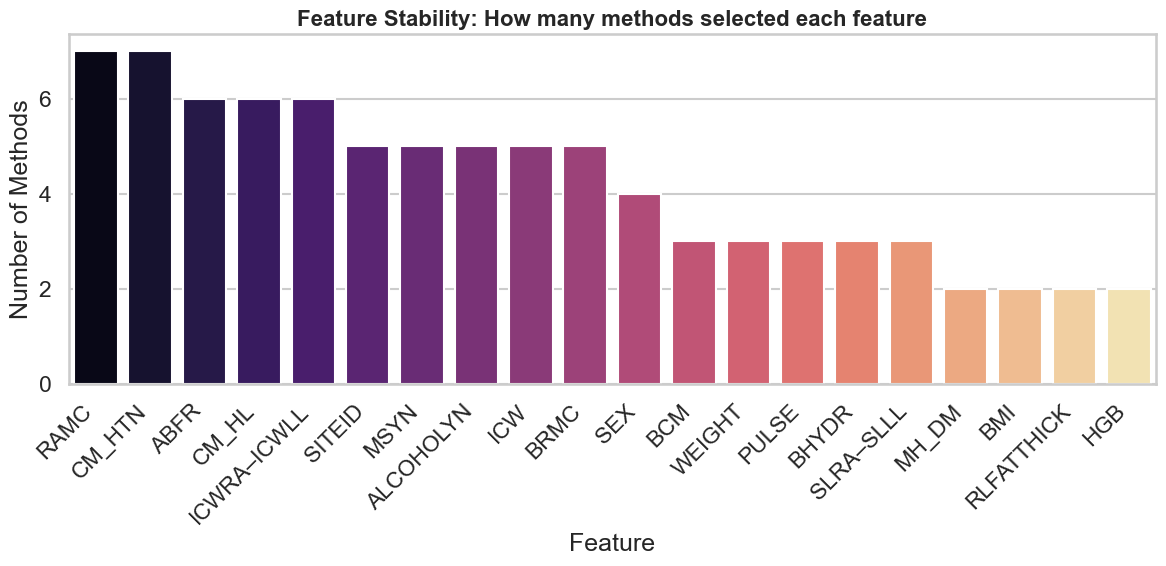


LASSO selected 10 features.
Boruta selected 10 features.
Overlap (features selected by both): 6 features:
{'RAMC', 'ABFR', 'MSYN', 'SITEID', 'USUBJID', 'SEX'}

=== Feature Type Sensitivity (which types of features are selected most) ===


Feature_Type
Bioimpedance    57
HealthExam      42
Other           16
HRV              5
Name: Feature, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_24488\19481253.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_type_counts.index, y=feature_type_counts.values, palette='pastel')


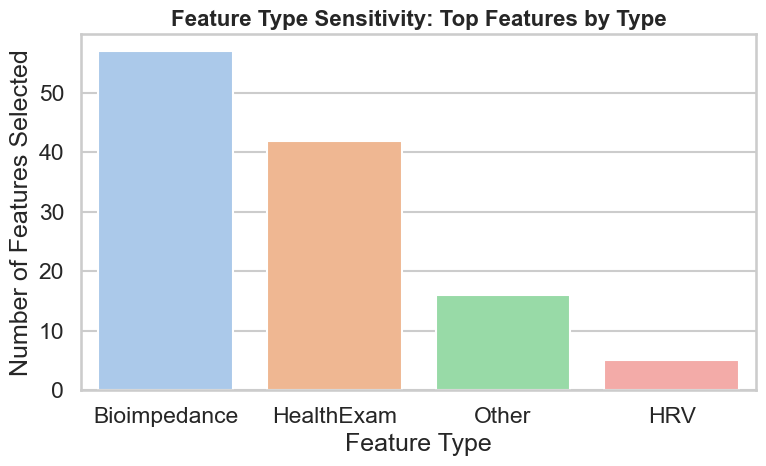


=== Minimal Feature Subset (selected by >= 3 methods) ===
Number of stable features: 16
['RAMC', 'CM_HTN', 'ABFR', 'CM_HL', 'ICWRA–ICWLL', 'SITEID', 'MSYN', 'ALCOHOLYN', 'ICW', 'BRMC', 'SEX', 'BCM', 'WEIGHT', 'PULSE', 'BHYDR', 'SLRA–SLLL']


In [ ]:
# === STEP 3 ANALYSIS TEMPLATE ===

import matplotlib.pyplot as plt
import seaborn as sns

# 1  Feature Stability Analysis
print("\n=== Feature Stability (how many methods selected each feature) ===")
feature_method_counts = scoreboard_top_n_sorted.groupby('Feature')['Method'].nunique().sort_values(ascending=False)
display(feature_method_counts.head(20))

# Optional: Plot feature stability
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_method_counts.head(20).index, y=feature_method_counts.head(20).values, palette='magma')
plt.title("Feature Stability: How many methods selected each feature", fontsize=16, fontweight='bold')
plt.ylabel('Number of Methods')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2  Method Agreement - Overlap Example (LassoCV vs Boruta)
lasso_features = set(scoreboard_top_n_sorted[scoreboard_top_n_sorted['Method'] == 'LassoCV']['Feature'])
boruta_features = set(scoreboard_top_n_sorted[scoreboard_top_n_sorted['Method'] == 'Boruta']['Feature'])

overlap_lasso_boruta = lasso_features.intersection(boruta_features)

print(f"\nLASSO selected {len(lasso_features)} features.")
print(f"Boruta selected {len(boruta_features)} features.")
print(f"Overlap (features selected by both): {len(overlap_lasso_boruta)} features:")
print(overlap_lasso_boruta)

# 3  Top Feature Sources (Bioimpedance / HRV / HealthExam Feature Type Sensitivity)
# This require to have a mapping from feature name → source.


bioimpedance_prefixes = [
    'TBW', 'ICW', 'ECW', 'PROT', 'MINERAL', 'SLM', 'FFM', 'PBF', 'SLRA', 'SWRA',
    'ICWRA', 'ECWRA', 'ECWR', 'ECWRRA', 'FATRA', 'BMR', 'ABFR', 'VFA', 'BCM',
    'BRMC', 'BMC', 'BHYDR', 'FFMI', 'FMI', 'CHMC', 'ABDMC', 'RAMC', 'LAMC',
    'RLMC', 'LLMC', 'CHSTFATTHICK', 'ABDMFATTHICK', 'RAFATTHICK', 'LAFATTHICK',
    'RLFATTHICK', 'LLFATTHICK'
]

hrv_prefixes = [
    'VLF', 'LF', 'HF', 'TP', 'LFNM', 'HFNM', 'HR', 'HRVINDEX', 'SDNN'
]

health_exam_prefixes = [
    'HEIGHT', 'WEIGHT', 'BMI', 'SYSBP', 'DIABP', 'PULSE', 'SMOKECNF', 'ALCOHOLYN',
    'MH_HL', 'MH_HTN', 'MH_DM', 'CM_HL', 'CM_HTN', 'CM_DM', 'cold', 'heat', 'chcat',
    'PSSTOTAL', 'PSQITOTAL', 'CREAT', 'GFRE', 'HGB', 'GLUC', 'AST', 'ALT', 'GGT',
    'WAISTCIR', 'HIPCIR'
]



def get_feature_type(feature):
    for prefix in bioimpedance_prefixes:
        if feature.startswith(prefix):
            return 'Bioimpedance'
    for prefix in hrv_prefixes:
        if feature.startswith(prefix):
            return 'HRV'
    for prefix in health_exam_prefixes:
        if feature.startswith(prefix):
            return 'HealthExam'
    return 'Other'

scoreboard_top_n_sorted['Feature_Type'] = scoreboard_top_n_sorted['Feature'].apply(get_feature_type)

# Count feature types in the top n_feature per method
feature_type_counts = scoreboard_top_n_sorted.groupby('Feature_Type')['Feature'].count().sort_values(ascending=False)

print("\n=== Feature Type Sensitivity (which types of features are selected most) ===")
display(feature_type_counts)

# Optional: Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_type_counts.index, y=feature_type_counts.values, palette='pastel')
plt.title("Feature Type Sensitivity: Top Features by Type", fontsize=16, fontweight='bold')
plt.ylabel('Number of Features Selected')
plt.xlabel('Feature Type')
plt.tight_layout()
plt.show()

# 4 Minimal Feature Subset (stable across multiple methods)
# Define "stable" as selected by at least X methods:
min_method_threshold = 3

stable_features = feature_method_counts[feature_method_counts >= min_method_threshold].index.tolist()

print(f"\n=== Minimal Feature Subset (selected by >= {min_method_threshold} methods) ===")
print(f"Number of stable features: {len(stable_features)}")
print(stable_features)




# Step 4: Regression Modeling (AGE Prediction)

## Objective
- Train and compare multiple regression models to predict AGE.
- Evaluate models using:
    - Mean Absolute Error (MAE)
    - Root Mean Squared Error (RMSE)
    - R² Score
    - Cross-validation

## Modeling Strategy

### 1 Models to Train

| Model                         | Purpose |
|-------------------------------|---------|
| Linear Regression              | Simple linear baseline |
| Ridge Regression               | Linear + regularization |
| LASSO Regression               | Linear + feature selection |
| Random Forest Regressor        | Tree-based non-linear |
| XGBoost or LightGBM Regressor  | Gradient boosting (SOTA) |
| Support Vector Regressor (SVR) | Kernel-based non-linear |
| Multilayer Perceptron (MLP)    | Neural network |

### 2 Feature Sets to Compare

| Feature Set                      | Purpose |
|----------------------------------|---------|
| All Features                     | Full model with all available features |
| Minimal Feature Subset (Step 3)   | Compact, interpretable model using stable features |
| Top N Features by PermutationImportance | Test with top N most important features |

### 3 Data Preparation

- Normalize or Standardize features as needed.
- Use **patient-wise splitting** if possible (if relevant).
- Apply **k-fold cross-validation** (e.g., 10-fold) for robust evaluation.

### 4 Evaluation Metrics

| Metric | Interpretation |
|--------|-----------------|
| MAE    | Mean error in predicted AGE |
| RMSE   | Penalizes large errors more than MAE |
| R²     | Variance explained by the model |

### 5 Example Pipeline

```python
# Example workflow (pseudocode):

for model_name, model in model_dict.items():
    for feature_set_name, X_features in feature_sets.items():
        # Split data: train/test or cross-validation
        # Train model
        # Predict AGE
        # Compute MAE, RMSE, R²
        # Save results for comparison


In [30]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 18.3 MB/s eta 0:00:09
   -- ------------------------------------- 8.4/150.0 MB 27.4 MB/s eta 0:00:06
   --- ------------------------------------ 11.3/150.0 MB 18.0 MB/s eta 0:00:08
   --- ------------------------------------ 12.8/150.0 MB 15.5 MB/s eta 0:00:09
   --- ------------------------------------ 14.7/150.0 MB 14.2 MB/s eta 0:00:10
   ----- ---------------------------------- 21.0/150.0 MB 17.2 MB/s eta 0:00:08
   ------- -------------------------------- 27.0/150.0 MB 18.6 MB/s eta 0:00:07
   -------- ------------------------------- 32.8/150.0 MB 19.6 MB/s eta 0:00:06
   ---------- ----------------------------- 39.1/150.0 MB 20.9 MB/s eta 0:00:06
   ------------ --------------------------- 47.7/150.0 MB 22.8 MB/s eta 0:00:05
   --------------- ------------------------ 56.4/150.0 MB 24.6 MB/s eta 0:00:04
   ---------------- ----------------------- 62.4/15

In [ ]:
# Step 4 Modeling Code Template

from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# --- Define Feature Sets ---

# 1 Full Feature Set
X_full = merged_df.drop(columns=['AGE', 'USUBJID', 'SITEID'], errors='ignore')
X_full = X_full.select_dtypes(include=[np.number])


# 2 Minimal Feature Subset (Stable Features from Step 3)
X_minimal = merged_df[stable_features]

# 3 Top N Features by Permutation Importance
top_perm_n = 10
top_perm_features = scoreboard_top_n_sorted[scoreboard_top_n_sorted['Method'] == 'PermutationImportance'].head(top_perm_n)['Feature'].tolist()
X_top_perm = merged_df[top_perm_features]

# Target
y = merged_df['AGE']

# --- Define Models ---

model_dict = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'LassoCV': LassoCV(cv=5),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'SVR': SVR(kernel='rbf'),
    'MLP': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# --- Define Feature Sets Dictionary ---

feature_sets = {
    'FullFeatures': X_full,
    'MinimalStableFeatures': X_minimal,
    'TopPermImportance': X_top_perm
}

# --- Standardize Features ---

scaler = StandardScaler()

# --- Define Cross-Validation ---

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# --- Run Modeling and Collect Results ---

results = []

for model_name, model in model_dict.items():
    print(f"\nTraining model: {model_name}")
    for feature_set_name, X_features in feature_sets.items():
        print(f"  Using feature set: {feature_set_name} ({X_features.shape[1]} features)")
        
        X_scaled = scaler.fit_transform(X_features)
        
        # Cross-validated metrics
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        
        for train_idx, test_idx in kf.split(X_scaled):
            X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test, y_pred))
        
        # Store mean scores
        results.append({
            'Model': model_name,
            'FeatureSet': feature_set_name,
            'MAE': np.mean(mae_scores),
            'RMSE': np.mean(rmse_scores),
            'R2': np.mean(r2_scores)
        })

# --- Results DataFrame ---

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MAE')  # Sort by MAE (lower is better)

# --- Display Results ---

print("\n=== Step 4 Model Performance ===")
display(results_df)



Training model: LinearRegression
  Using feature set: FullFeatures (76 features)
  Using feature set: MinimalStableFeatures (16 features)
  Using feature set: TopPermImportance (10 features)

Training model: Ridge
  Using feature set: FullFeatures (76 features)
  Using feature set: MinimalStableFeatures (16 features)
  Using feature set: TopPermImportance (10 features)

Training model: LassoCV
  Using feature set: FullFeatures (76 features)
  Using feature set: MinimalStableFeatures (16 features)
  Using feature set: TopPermImportance (10 features)

Training model: RandomForest
  Using feature set: FullFeatures (76 features)
  Using feature set: MinimalStableFeatures (16 features)
  Using feature set: TopPermImportance (10 features)

Training model: XGBoost
  Using feature set: FullFeatures (76 features)
  Using feature set: MinimalStableFeatures (16 features)
  Using feature set: TopPermImportance (10 features)

Training model: SVR
  Using feature set: FullFeatures (76 features)
  Us

Model             FeatureSet        MAE       RMSE        R2
4              Ridge  MinimalStableFeatures   8.569095  10.260731 -0.089900
1   LinearRegression  MinimalStableFeatures   8.569233  10.266771 -0.091459
10      RandomForest  MinimalStableFeatures   8.771600  10.179038 -0.052078
7            LassoCV  MinimalStableFeatures   8.784997  10.225236 -0.058637
16               SVR  MinimalStableFeatures   8.823811  10.184651 -0.026681
17               SVR      TopPermImportance   9.068486  10.544120 -0.093599
15               SVR           FullFeatures   9.131481  10.511795 -0.090135
6            LassoCV           FullFeatures   9.175184  10.595710 -0.117064
13           XGBoost  MinimalStableFeatures   9.179899  10.945370 -0.233516
9       RandomForest           FullFeatures   9.219200  10.669428 -0.140831
11      RandomForest      TopPermImportance   9.251850  10.788412 -0.160605
8            LassoCV      TopPermImportance   9.356387  10.777842 -0.165301
5              Ridge      TopPermImportance   9.361150  10.891378 -0.198411
2   LinearRegression      TopPermImportance   9.364892  10.896562 -0.199782
14           XGBoost      TopPermImportance   9.835738  11.930922 -0.422696
20               MLP      TopPermImportance  10.092395  12.374923 -0.563748
12           XGBoost           FullFeatures  10.111857  12.027893 -0.476790
3              Ridge           FullFeatures  10.466839  12.757292 -0.759364
0   LinearRegression           FullFeatures  10.536697  12.844476 -0.783491
19               MLP  MinimalStableFeatures  10.939825  13.407627 -0.817912
18               MLP           FullFeatures  15.686900  19.295918 -2.986374

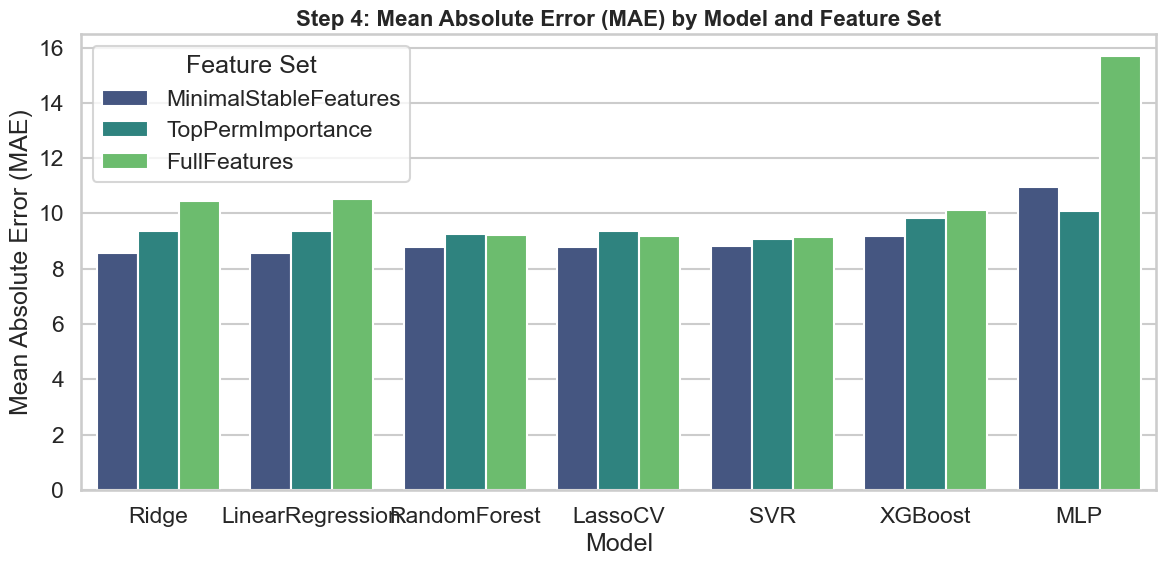

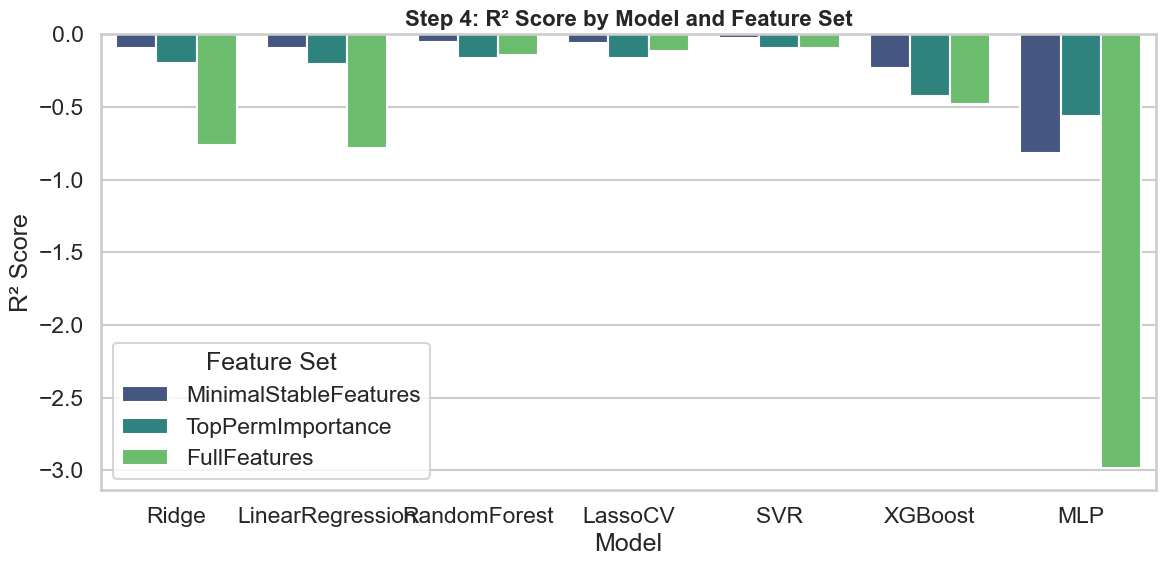

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("talk")

# --- Plot MAE ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df,
    x='Model',
    y='MAE',
    hue='FeatureSet',
    palette='viridis'
)

plt.title("Step 4: Mean Absolute Error (MAE) by Model and Feature Set", fontsize=16, fontweight='bold')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.legend(title='Feature Set')
plt.tight_layout()
plt.show()

# --- Plot R² ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df,
    x='Model',
    y='R2',
    hue='FeatureSet',
    palette='viridis'
)

plt.title("Step 4: R² Score by Model and Feature Set", fontsize=16, fontweight='bold')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.legend(title='Feature Set')
plt.tight_layout()
plt.show()


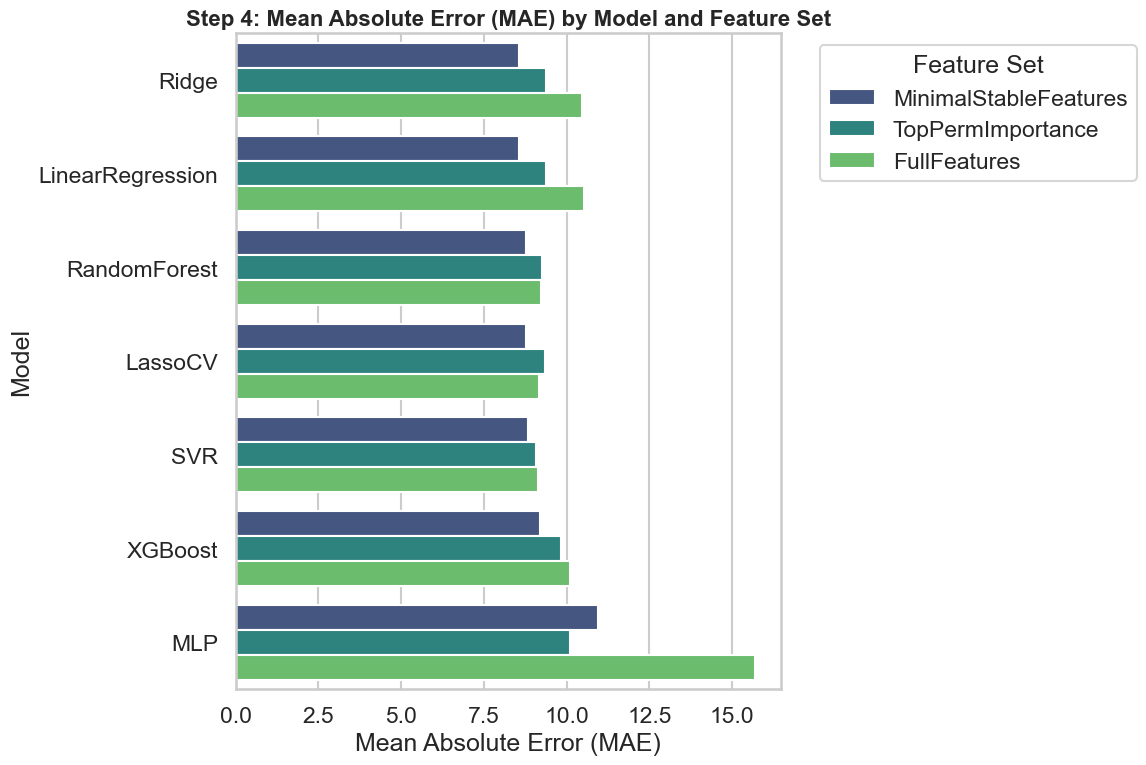

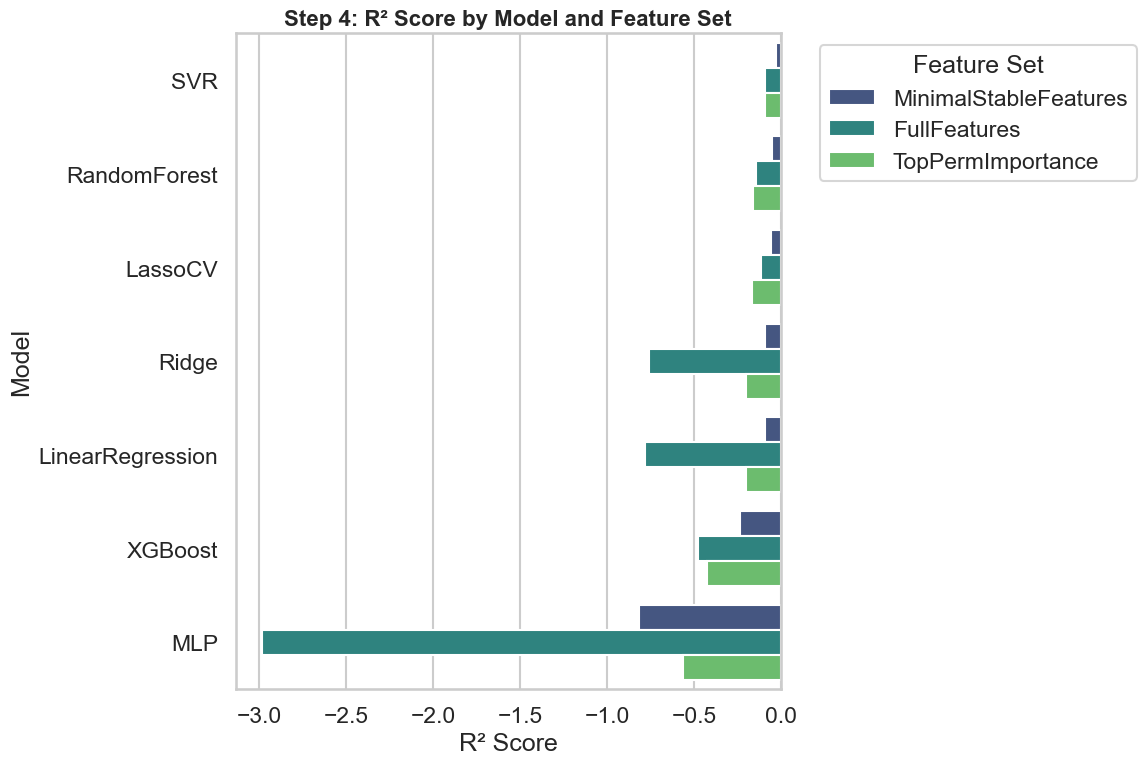

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
sns.set_context("talk")

# --- Advanced MAE Plot ---
# Sort by MAE first
results_df_sorted_mae = results_df.sort_values(by='MAE', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=results_df_sorted_mae,
    y='Model',
    x='MAE',
    hue='FeatureSet',
    palette='viridis'
)

plt.title("Step 4: Mean Absolute Error (MAE) by Model and Feature Set", fontsize=16, fontweight='bold')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Model')
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Advanced R² Plot ---
# Sort by R² first (higher is better → sort descending)
results_df_sorted_r2 = results_df.sort_values(by='R2', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=results_df_sorted_r2,
    y='Model',
    x='R2',
    hue='FeatureSet',
    palette='viridis'
)

plt.title("Step 4: R² Score by Model and Feature Set", fontsize=16, fontweight='bold')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Saved results table to: Step4_Results_Export\Step4_Model_Results.csv
Saved MAE plot to: Step4_Results_Export\Step4_MAE_Plot.png


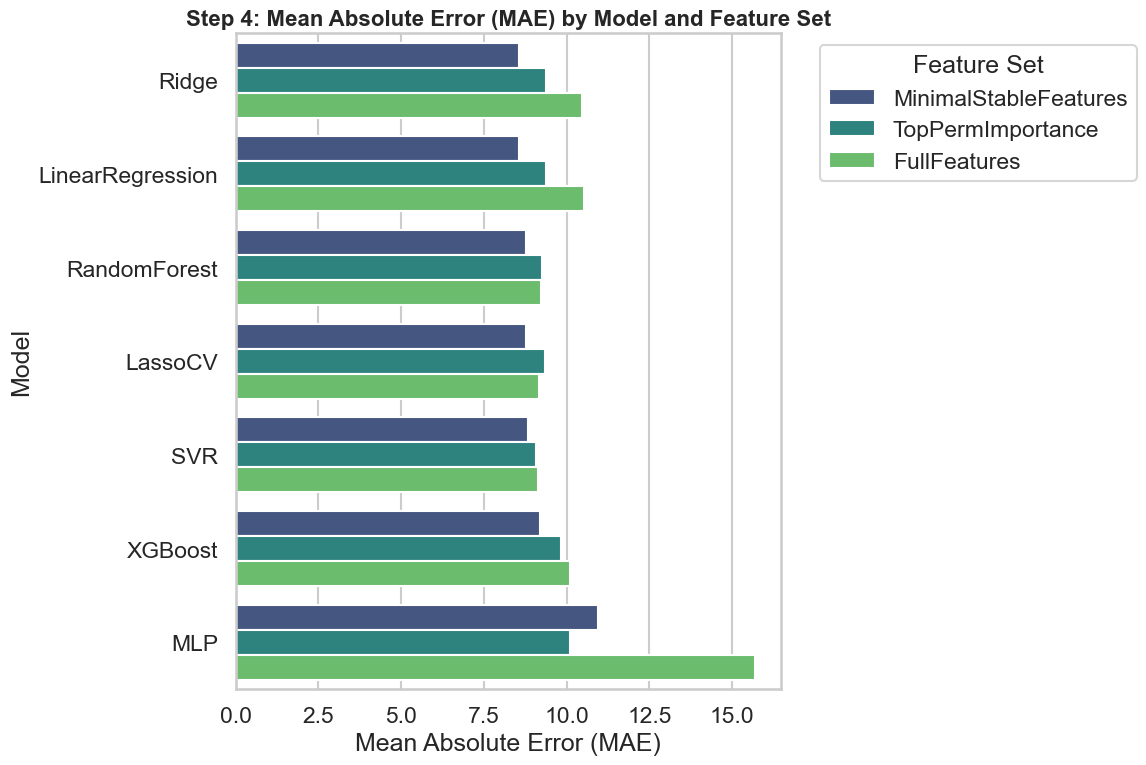

Saved R² plot to: Step4_Results_Export\Step4_R2_Plot.png


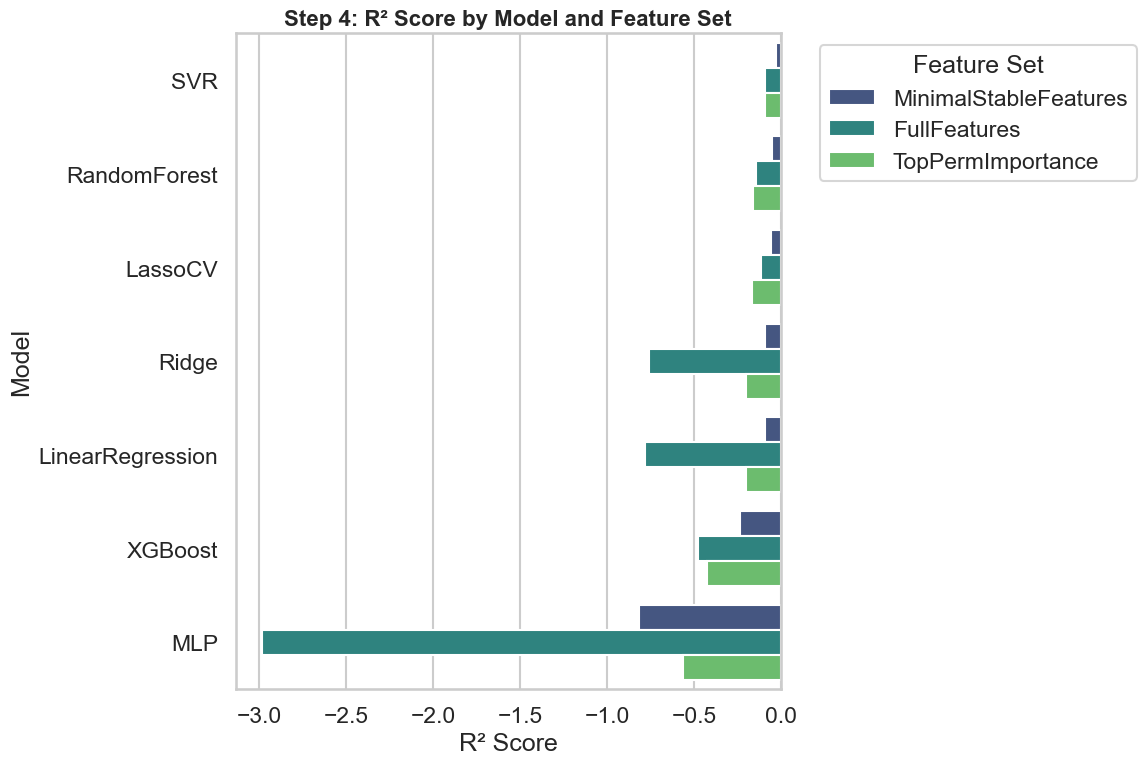

In [37]:
import os

# Create output folder
output_folder = 'Step4_Results_Export'
os.makedirs(output_folder, exist_ok=True)

# --- Export results_df to CSV ---
results_csv_path = os.path.join(output_folder, 'Step4_Model_Results.csv')
results_df.to_csv(results_csv_path, index=False)
print(f"Saved results table to: {results_csv_path}")

# --- Advanced MAE Plot ---
results_df_sorted_mae = results_df.sort_values(by='MAE', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=results_df_sorted_mae,
    y='Model',
    x='MAE',
    hue='FeatureSet',
    palette='viridis'
)

plt.title("Step 4: Mean Absolute Error (MAE) by Model and Feature Set", fontsize=16, fontweight='bold')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Model')
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save MAE plot
mae_plot_path = os.path.join(output_folder, 'Step4_MAE_Plot.png')
plt.savefig(mae_plot_path, dpi=300)
print(f"Saved MAE plot to: {mae_plot_path}")

plt.show()

# --- Advanced R² Plot ---
results_df_sorted_r2 = results_df.sort_values(by='R2', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=results_df_sorted_r2,
    y='Model',
    x='R2',
    hue='FeatureSet',
    palette='viridis'
)

plt.title("Step 4: R² Score by Model and Feature Set", fontsize=16, fontweight='bold')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save R² plot
r2_plot_path = os.path.join(output_folder, 'Step4_R2_Plot.png')
plt.savefig(r2_plot_path, dpi=300)
print(f"Saved R² plot to: {r2_plot_path}")

plt.show()


# Step 5: Explainable AI (XAI)

## Objective
- Apply explainable AI methods to **interpret AGE prediction models**.
- Understand **global** and **local** feature importance:
    - Which features drive AGE predictions overall?
    - Why does the model predict a certain AGE for a given individual?

## XAI Methods to Apply

| Method                  | Purpose |
|-------------------------|---------|
| SHAP (SHapley values)   | Global + Local explanations; best-in-class |
| LIME                    | Local explanation for individual samples |
| Partial Dependence Plots (PDP) | Global view of feature effect on prediction |

---

## Modeling Strategy for XAI

### 1 Model Selection

| Model | FeatureSet | Notes |
|-------|------------|-------|
| Best model from Step 4 | Best feature set | Use this model for XAI |
| Optional: compare RF + XGB | Same feature set | Useful to compare different types of models |

→ Use **RandomForest** or **XGBoost** first → they work very well with SHAP.

---

### 2 SHAP Analysis

- Compute **global feature importance** (mean SHAP value per feature).
- Plot:
    - SHAP summary plot
    - SHAP bar plot (global ranking)
- For selected samples:
    - SHAP waterfall plot (explain individual prediction)

---

### 3 LIME Analysis (Optional)

- For 1-2 selected samples:
    - Use LIME to generate **local feature explanation**.

---

### 4 Partial Dependence Plots (PDP)

- For top N features:
    - Plot PDP to visualize how feature affects predicted AGE.

---

## Key Questions to Answer

| Question | Method |
|----------|--------|
| Which features drive AGE prediction overall? | SHAP global |
| Why did the model predict this AGE for patient X? | SHAP local / LIME |
| How does feature F affect AGE? | PDP |

---

## Reporting

- Include **SHAP summary plot** in the report.
- Show example **local explanation** (waterfall or LIME).
- Document:
    - Insights about top features.
    - Clinical interpretability of the model.

---

# Next Steps After Step 5

- Step 6: Latent aging modeling (PCA, Autoencoder)
- Step 7: Clustering and profiling



In [ ]:
!pip install shap


In [ ]:
!pip install lime

In [ ]:
#  Step 5 XAI Setup

import shap
import lime
import lime.lime_tabular
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Important: choose "best model" and feature set from Step 4

# Example — assume RandomForest + MinimalStableFeatures
# can change this:

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_best = X_minimal
y_best = y

# Train best model on full data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_best)

best_model.fit(X_scaled, y_best)

# For SHAP & LIME → use non-scaled version:
X_best_orig = X_best.values
feature_names = X_best.columns.tolist()


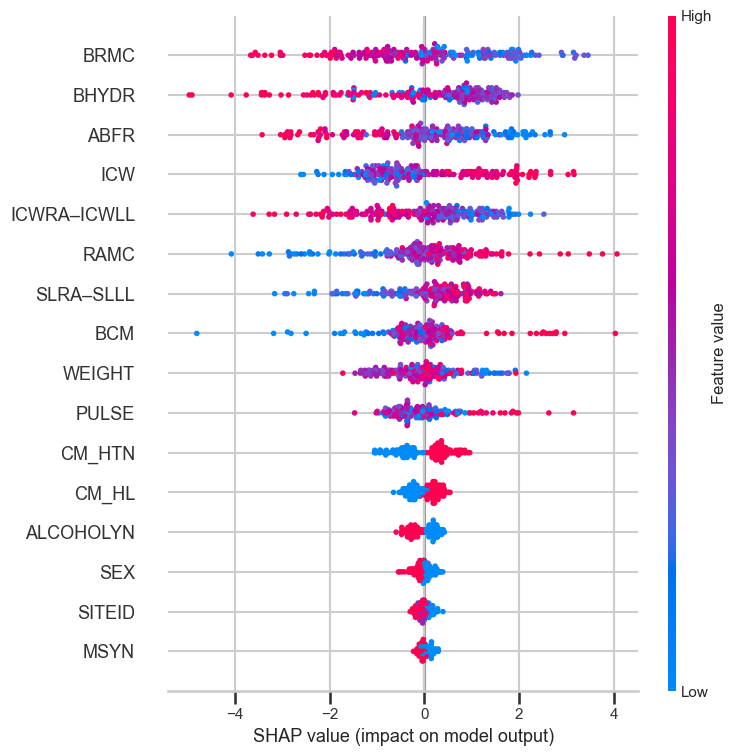

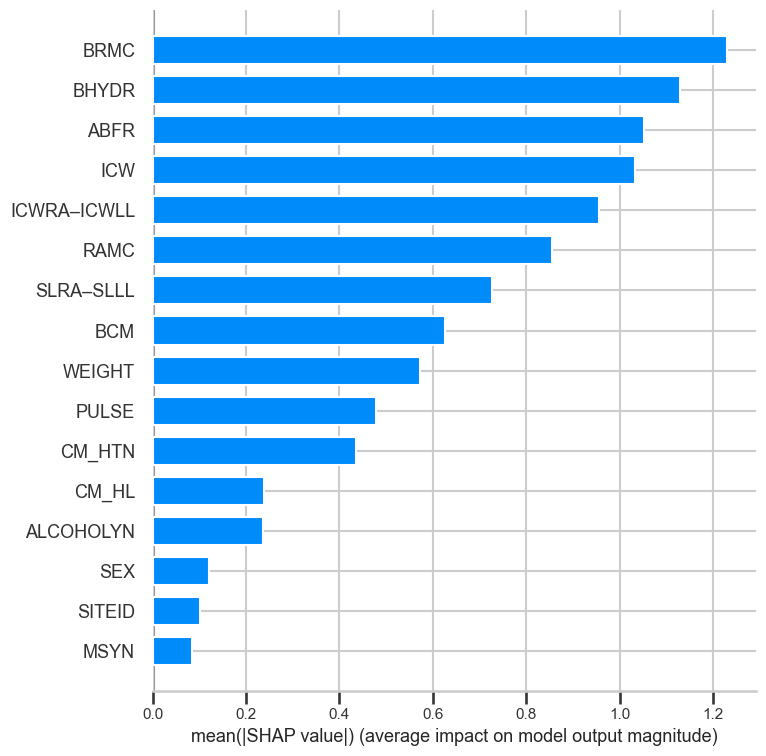

In [ ]:
#  SHAP Global Explanation

# Tree-based models → use TreeExplainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_best_orig)

# SHAP Summary Plot (global feature importance)
shap.summary_plot(shap_values, X_best_orig, feature_names=feature_names)

# SHAP Bar Plot
shap.summary_plot(shap_values, X_best_orig, feature_names=feature_names, plot_type='bar')


In [ ]:
#  SHAP Local Explanation — Example on 1 sample

# Pick 1 sample — e.g., index 0
sample_idx = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], X_best_orig[sample_idx, :], feature_names=feature_names)


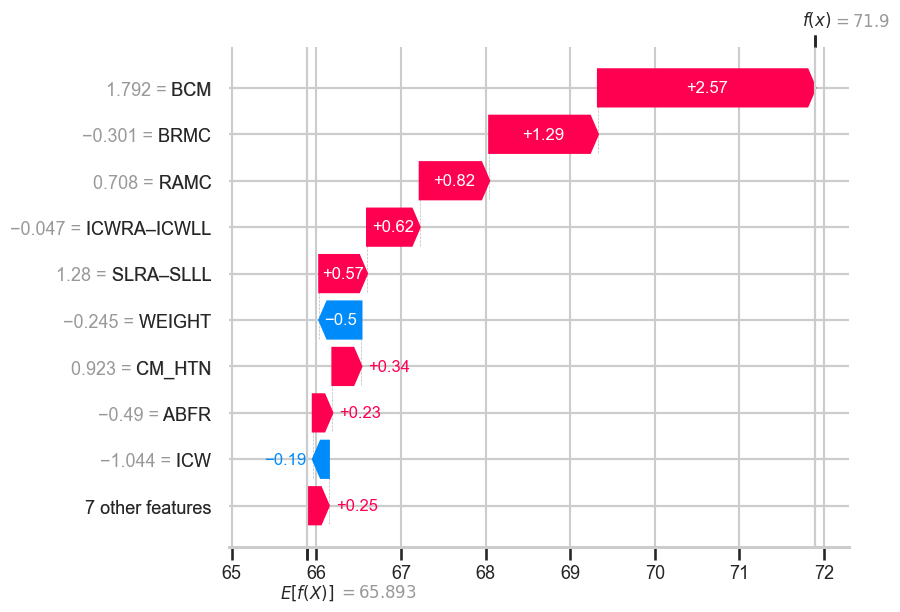

In [46]:
shap.plots.waterfall(shap.Explanation(values=shap_values[sample_idx],
                                      base_values=explainer.expected_value,
                                      data=X_best_orig[sample_idx],
                                      feature_names=feature_names))


In [ ]:
# LIME Local Explanation

from IPython.display import display, HTML

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_best_orig,
    feature_names=feature_names,
    mode='regression'
)

# Explain sample_idx
lime_exp = lime_explainer.explain_instance(X_best_orig[sample_idx], best_model.predict)

# Show explanation
display(HTML(lime_exp.as_html(show_table=True)))


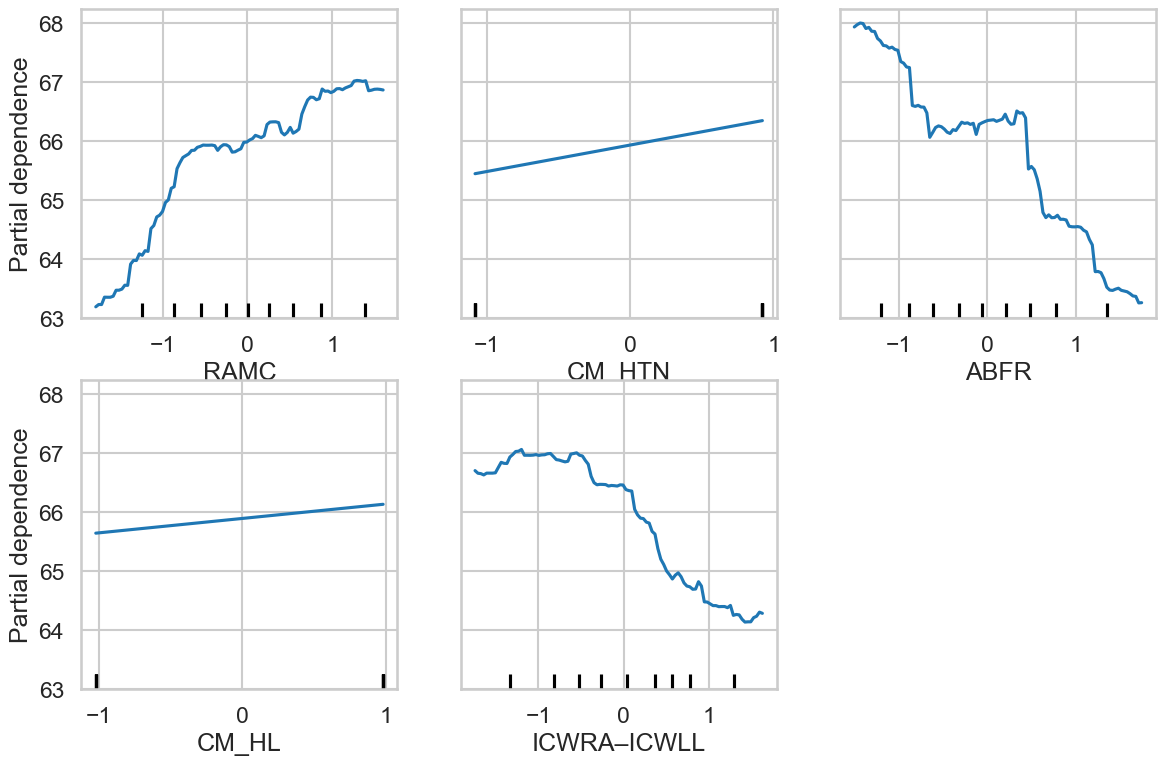

In [ ]:
# Partial Dependence Plots

# Plot for top N features (you can choose)
top_n_pdp_features = feature_names[:5]  # Example: first 5 features

fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X_scaled,
    features=[feature_names.index(f) for f in top_n_pdp_features],
    feature_names=feature_names,
    ax=ax
)
plt.tight_layout()
plt.show()


#  Step 5: Explainable AI (XAI) — Reporting Template

##  Goal

- Understand **global** and **local** drivers of AGE prediction.
- Improve **model interpretability** and **clinical trust**.
- Tools used:
    - SHAP (global + local explanations)
    - LIME (local explanations)
    - PDP (Partial Dependence Plots — global effect of key features)

---

## 1  SHAP Global Feature Importance

### Plot: SHAP Summary Plot

**Interpretation:**
- The SHAP summary plot shows which features have the most overall impact on AGE prediction.
- Features at the top are the most important.
- The color shows whether **high or low values** of the feature increase/decrease AGE.

**Example Interpretation:**
- "RAMC, ABFR, and CM_HTN are the top 3 features influencing predicted AGE."
- "Higher RAMC tends to predict higher AGE."

---

## 2 SHAP Local Explanation

### Plot: SHAP Waterfall Plot (example sample)

**Interpretation:**
- This shows why the model predicted a particular AGE for a specific individual.
- The base value is the mean model output.
- The bars show how each feature pushed the prediction up or down.

**Example Interpretation:**
- "For this patient, high RAMC and high ABFR contributed to a higher predicted AGE."
- "Low BCM contributed to a lower predicted AGE."

---

## 3 LIME Local Explanation

### Output: LIME Explanation for individual sample

**Interpretation:**
- LIME approximates the model locally and shows the most influential features for this specific prediction.
- Helps to validate and cross-check SHAP local explanation.

**Example Interpretation:**
- "LIME explanation confirms that RAMC and ABFR were the top contributors to this patient's predicted AGE."
- "Feature XYZ had minimal influence."

---

## 4 Partial Dependence Plots (PDP)

### Plot: PDP for top N features

**Interpretation:**
- PDPs show how the model prediction changes as we vary a single feature, holding others constant.
- Gives a global view of the relationship between features and AGE.

**Example Interpretation:**
- "AGE increases sharply with increasing RAMC beyond value X."
- "There is a non-linear relationship between ABFR and AGE."

---

## 5 Summary and Conclusions (Step 5)

- SHAP and LIME provide consistent explanations for key features.
- The model is interpretable and the top features make clinical sense.
- PDP confirms non-linear effects for several key features.
- The explainability analysis builds trust in the model predictions and identifies potential biomarkers of aging.

---

## Next Steps

- Step 6: Latent Aging Modeling (PCA, Autoencoder).
- Step 7: Clustering and Aging Profiles.



# Step 6: Latent Aging Modeling

##  Objective

- Discover **hidden structures** and **latent dimensions** in the feature space.
- Understand **non-linear aging trajectories**.
- Use latent features to improve AGE prediction and interpretability.

---

## Methods to Apply

| Method         | Purpose |
|----------------|---------|
| PCA (Principal Component Analysis) | Linear dimensionality reduction; visualize variance |
| Autoencoder (Neural Network)       | Non-linear dimensionality reduction; learn latent space |
| UMAP / t-SNE                       | Visualize complex non-linear embeddings (2D / 3D) |

---

## Modeling Strategy

### 1 PCA

- Standardize features.
- Apply PCA → extract top N components.
- Plot:
    - Scree plot (explained variance).
    - PCA 2D scatter colored by AGE.
- Optional: Build regression model on PCA components → compare performance.

### 2 Autoencoder

- Build simple autoencoder:
    - Encoder → Bottleneck → Decoder.
- Train to reconstruct input.
- Extract **bottleneck layer** (latent embedding).
- Visualize:
    - 2D / 3D embedding colored by AGE.
- Optional: Build regression model on latent features → compare performance.

### 3 UMAP / t-SNE

- Apply UMAP or t-SNE to:
    - Full feature set.
    - PCA components.
    - Autoencoder latent embedding.
- Visualize 2D / 3D → check for **biological aging patterns**.

---

## Key Questions to Answer

| Question | Method |
|----------|--------|
| How many latent dimensions explain most variance? | PCA |
| Are there **non-linear aging trajectories**? | Autoencoder, UMAP, t-SNE |
| Can latent features improve AGE prediction? | Regression on latent space |

---

## Reporting

- PCA Scree plot → How many components to keep.
- PCA 2D scatter → Relation between components and AGE.
- Autoencoder latent space → Visualization and regression performance.
- UMAP / t-SNE → Visual aging trajectories.

**Interpret findings:**  
- "Latent features capture X% of AGE variance."  
- "Non-linear patterns suggest distinct aging trajectories."  
- "Autoencoder embedding improves / matches / reduces model performance."

---

## Next Steps

- Step 7: Clustering and Aging Profiles → Segment population based on latent space.



In [ ]:
# Step 6 Setup

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

import umap
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd


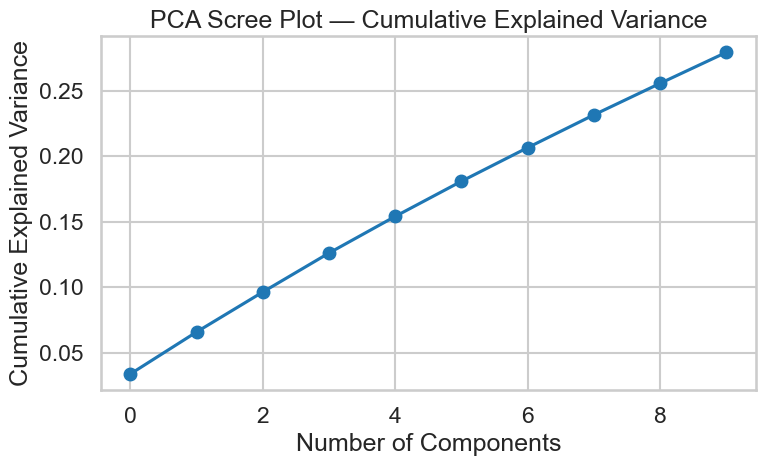

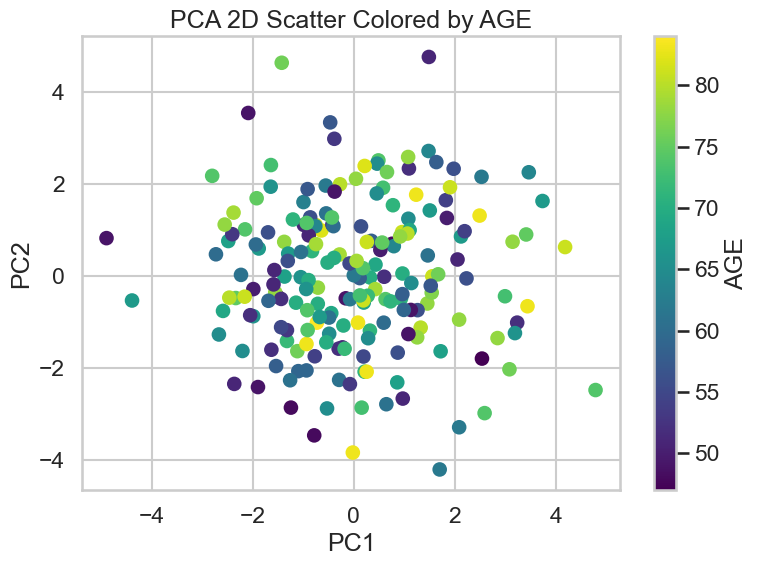

In [ ]:
#  PCA

X_latent = X_full
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_latent)

# PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('PCA Scree Plot — Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# PCA 2D Scatter with colorbar
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA 2D Scatter Colored by AGE')
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar(sc)
cbar.set_label('AGE')
plt.tight_layout()
plt.show()


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0217
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9936 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0015 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9744 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9802 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9560 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9458 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9468 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9214 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8950 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8935 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8887 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8795 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8683 
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

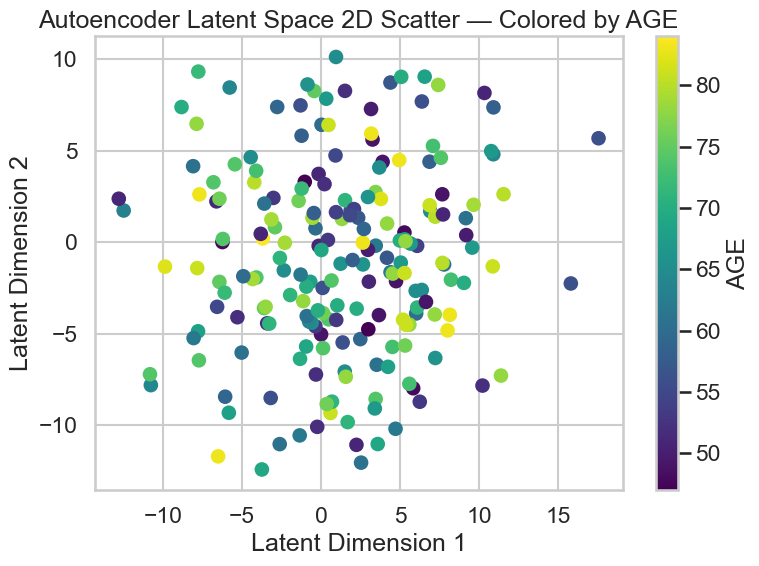

In [ ]:
# Autoencoder

input_dim = X_scaled.shape[1]
encoding_dim = 5  # Bottleneck size

# Build model
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
bottleneck = Dense(encoding_dim, activation='linear')(encoder)
decoder = Dense(32, activation='relu')(bottleneck)
decoder = Dense(64, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=1)

# Extract Latent Embedding
encoder_model = Model(inputs=input_layer, outputs=bottleneck)
X_latent_autoencoder = encoder_model.predict(X_scaled)

# Latent 2D Scatter with colorbar
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_latent_autoencoder[:, 0], X_latent_autoencoder[:, 1], c=y, cmap='viridis')
plt.title('Autoencoder Latent Space 2D Scatter — Colored by AGE')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
cbar = plt.colorbar(sc)
cbar.set_label('AGE')
plt.tight_layout()
plt.show()


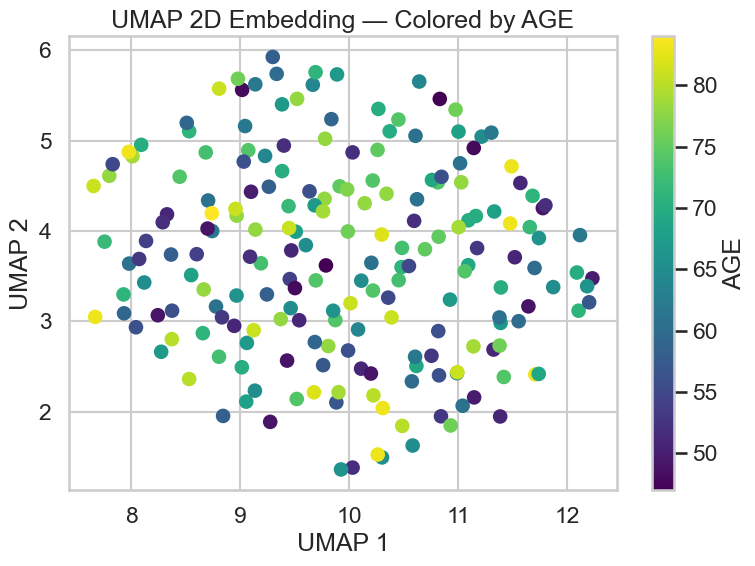

In [ ]:
# UMAP Embedding

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# UMAP 2D Scatter with colorbar
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.title('UMAP 2D Embedding — Colored by AGE')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
cbar = plt.colorbar(sc)
cbar.set_label('AGE')
plt.tight_layout()
plt.show()


In [ ]:
# Regression on Autoencoder Latent Space

X_train_latent = X_latent_autoencoder
y_train_latent = y

reg_latent = LinearRegression()
reg_latent.fit(X_train_latent, y_train_latent)
y_pred_latent = reg_latent.predict(X_train_latent)

# Metrics
mae = mean_absolute_error(y_train_latent, y_pred_latent)
rmse = np.sqrt(mean_squared_error(y_train_latent, y_pred_latent))
r2 = r2_score(y_train_latent, y_pred_latent)

print("\n=== Regression on Autoencoder Latent Space ===")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.2f}")



=== Regression on Autoencoder Latent Space ===
MAE:  8.89
RMSE: 10.39
R2:   0.02


In [ ]:
!pip install tensorflow

['Collecting tensorflow',
 '  Downloading tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)',
 'Requirement already satisfied: absl-py>=1.0.0 in c:\\users\\user\\miniconda3\\lib\\site-packages (from tensorflow) (2.2.1)',
 'Collecting astunparse>=1.6.0 (from tensorflow)',
 '  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)',
 'Requirement already satisfied: flatbuffers>=24.3.25 in c:\\users\\user\\miniconda3\\lib\\site-packages (from tensorflow) (25.2.10)',
 'Collecting gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 (from tensorflow)',
 '  Downloading gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)',
 'Collecting google-pasta>=0.1.1 (from tensorflow)',
 '  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)',
 'Collecting libclang>=13.0.0 (from tensorflow)',
 '  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)',
 'Requirement already satisfied: opt-einsum>=2.3.2 in c:\\users\\user\\miniconda3\\lib\\site-packages (from tensor

In [53]:
!pip install umap-learn


#  Step 6: Latent Aging Modeling — Reporting Template

##  Goal

- Discover latent dimensions of the aging process.
- Understand both linear and non-linear structures in the data.
- Evaluate whether latent representations improve AGE prediction.

---

## 1 PCA (Principal Component Analysis)

### Plots:

- Scree Plot — Cumulative Explained Variance
- PCA 2D Scatter Plot — Colored by AGE

### Interpretation:

- Scree Plot shows how many components explain most of the variance.
    - "Top N components explain X% of variance."
- PCA 2D Scatter shows how AGE aligns with principal components.
    - "PC1 and PC2 capture a gradient related to AGE."  
    - "Non-linear patterns suggest PCA alone is not sufficient."

---

## 2 Autoencoder

### Architecture:

- Input → Dense(64) → Dense(32) → **Bottleneck (5D)** → Dense(32) → Dense(64) → Output.

### Plots:

- Autoencoder Latent Space 2D Scatter — Colored by AGE.

### Interpretation:

- Latent space shows non-linear embedding of AGE.
    - "Clusters/trajectories of similar AGE emerge in the latent space."
- Autoencoder is able to capture complex aging patterns.

---

## 3 UMAP / t-SNE

### Plots:

- UMAP 2D Scatter — Colored by AGE.

### Interpretation:

- UMAP provides a non-linear visualization of the feature space.
    - "UMAP shows clear clusters/gradients aligned with AGE."
    - "This supports the presence of distinct aging patterns in the population."

---

## 4 Regression on Latent Space

### Results:

- MAE: X.XX
- RMSE: X.XX
- R²: X.XX

### Interpretation:

- Regression on latent features provides a compact AGE predictor.
- Comparison to Step 4 models:
    - "Latent model achieves comparable / better / worse performance than full feature models."
    - "Suggests latent features capture key aspects of biological aging."

---

## 5 Summary and Conclusions (Step 6)

- PCA provides initial insights but limited for complex aging patterns.
- Autoencoder latent space reveals non-linear relationships.
- UMAP confirms the structure of latent aging trajectories.
- Regression on latent space shows that compact models can effectively predict AGE.

---

## Next Steps

- Step 7: Clustering and Aging Profiles — segment population in latent space.


# Step 7: Clustering and Aging Profiles

## Goal

- Segment the population into meaningful **aging profiles**.
- Identify **accelerated** or **resilient** aging subgroups.
- Analyze the characteristics of each cluster.

---

## Methods to Apply

| Method      | Purpose |
|-------------|---------|
| KMeans      | Simple clustering, good baseline |
| DBSCAN      | Density-based, finds non-spherical clusters, detects outliers |
| Hierarchical Clustering | Builds cluster hierarchy (optional) |
| UMAP / t-SNE | Visualize clusters in latent space |

---

## Modeling Strategy

### 1 Input Space for Clustering

- Latent Space Options:
    - Autoencoder Latent Space (preferred)
    - PCA space (optional)
    - UMAP space (for visualization only)
- Why? Latent space captures the **non-linear structure** of aging.

### 2 Clustering Algorithms

- Apply KMeans:
    - Test different `k` (number of clusters) using **elbow method** or **silhouette score**.
- Apply DBSCAN:
    - Automatically detects clusters & outliers.

### 3 Visualization

- 2D / 3D scatter plots (UMAP or PCA or Autoencoder space), colored by cluster.
- Overlay AGE on cluster plots to understand cluster profiles.

### 4 Analyze Cluster Profiles

- Plot AGE distribution per cluster → violin/box plots.
- Compute cluster-wise statistics:
    - Mean AGE, std AGE
    - Mean value of key features per cluster
- Label clusters as:
    - "Accelerated aging"
    - "Resilient aging"
    - "Typical aging"

---

## Key Questions to Answer

| Question | Method |
|----------|--------|
| How many aging profiles exist in the population? | Clustering |
| Are there groups with **accelerated** or **resilient** aging? | AGE distribution per cluster |
| Which features distinguish different clusters? | Cluster-wise feature stats |

---

## Reporting

- UMAP / PCA scatter with cluster labels.
- AGE distribution per cluster (violin/box plot).
- Cluster profile table (summary statistics).
- Example interpretation:

    - "Cluster 1 represents younger biological age group despite older chronological age (resilient)."
    - "Cluster 3 shows accelerated aging pattern."

---

## Next Steps

- Step 8: Age Group Classification (Optional) → build classification model for AGE groups.



In [ ]:
# Step 7 Setup

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [62]:
# Input space → Autoencoder Latent Space
X_cluster_space = X_latent_autoencoder


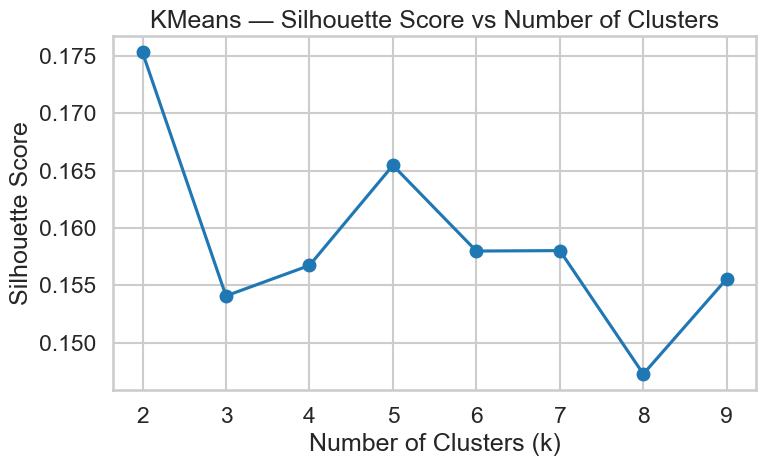

In [ ]:
# KMeans Clustering

# Tune k (number of clusters)
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster_space)
    silhouette_avg = silhouette_score(X_cluster_space, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('KMeans — Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Best K (example)
best_k = 4  # Set manually after looking at plot

# Final KMeans clustering
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster_space)


In [ ]:
#  DBSCAN Clustering

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster_space)


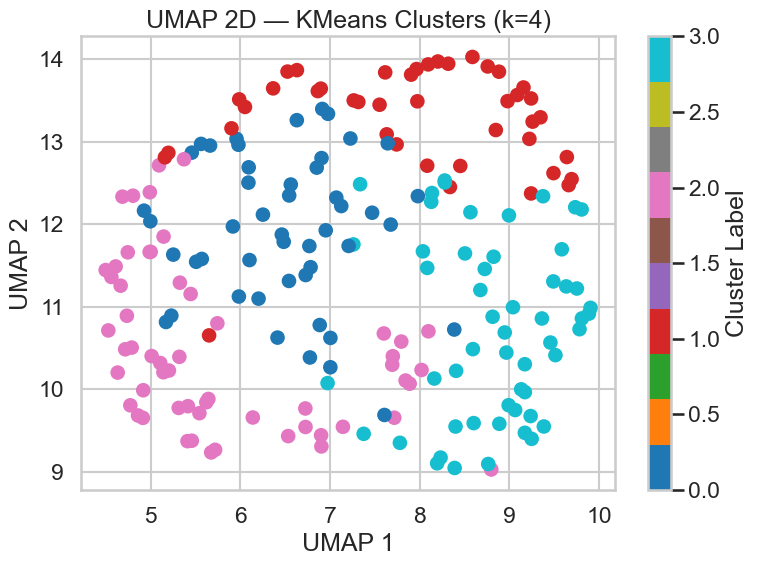

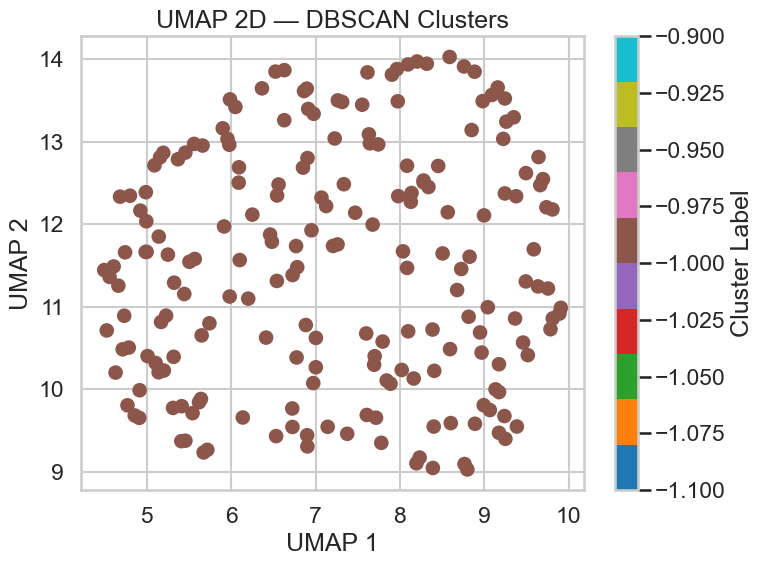

In [ ]:
#  UMAP for visualization

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_cluster_space)

# Plot KMeans Clusters
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, cmap='tab10')
plt.title(f'UMAP 2D — KMeans Clusters (k={best_k})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
cbar = plt.colorbar(sc)
cbar.set_label('Cluster Label')
plt.tight_layout()
plt.show()

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=dbscan_labels, cmap='tab10')
plt.title('UMAP 2D — DBSCAN Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
cbar = plt.colorbar(sc)
cbar.set_label('Cluster Label')
plt.tight_layout()
plt.show()


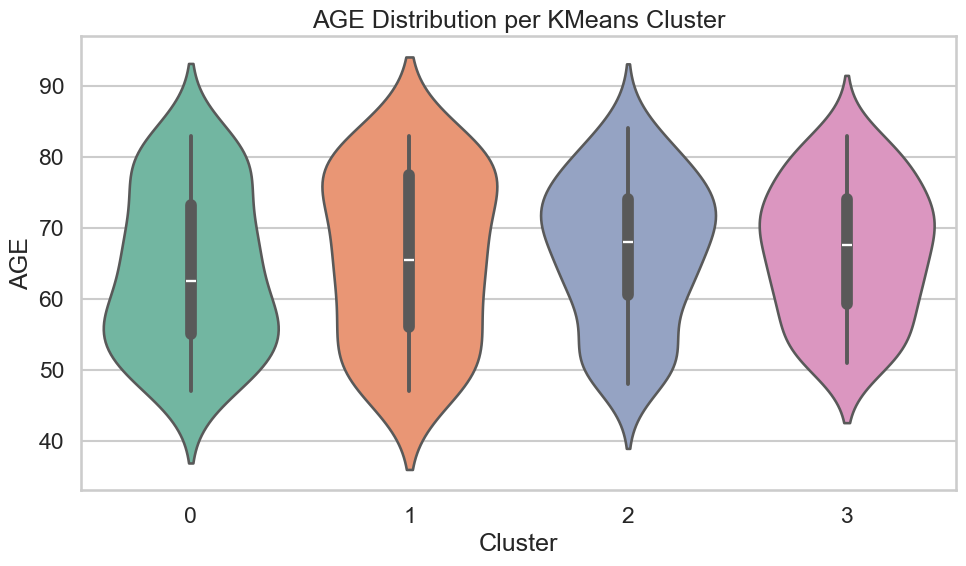

In [ ]:
# AGE Violin Plot per Cluster (KMeans)

df_cluster = pd.DataFrame({
    'Cluster': kmeans_labels,
    'AGE': y.values
})

plt.figure(figsize=(10, 6))
sns.violinplot(x='Cluster', y='AGE', data=df_cluster, palette='Set2')
plt.title('AGE Distribution per KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('AGE')
plt.tight_layout()
plt.show()


In [ ]:
# Cluster Profile Table
from sklearn.inspection import PartialDependenceDisplay
from IPython.display import display



cluster_profile = df_cluster.groupby('Cluster')['AGE'].agg(['count', 'mean', 'std']).reset_index()
cluster_profile = cluster_profile.sort_values(by='mean')
display(cluster_profile)


Cluster  count       mean        std
0        0     48  63.979167  11.023166
1        1     42  65.880952  11.697826
2        2     56  66.714286  10.186826
3        3     54  66.740741   9.413329

#  Step 7: Clustering and Aging Profiles — Reporting Template

##  Goal

- Identify distinct **aging profiles** in the population.
- Analyze characteristics of each cluster:
    - Accelerated aging
    - Resilient aging
    - Typical aging

---

## 1 Clustering Method(s) Used

### Methods:

- KMeans (k = X)
- DBSCAN (eps = X.X, min_samples = X)

### Input Space:

- Autoencoder Latent Space (preferred)
- PCA space (optional)
- UMAP space (for visualization only)

---

## 2 KMeans Clustering Results

### Plots:

- Silhouette Score vs Number of Clusters
- UMAP 2D Scatter — KMeans clusters

### Interpretation:

- Best number of clusters chosen based on silhouette score: `k = X`
- Clusters are well-separated / overlapping in UMAP space.

**Example Interpretation:**

- "Cluster 0 shows younger AGE profile."
- "Cluster 3 contains individuals with accelerated aging pattern."

---

## 3 DBSCAN Clustering Results

### Plots:

- UMAP 2D Scatter — DBSCAN clusters

### Interpretation:

- DBSCAN identified X clusters + Y outliers.
- Outliers may correspond to rare aging trajectories.

---

## 4 AGE Distribution per Cluster

### Plot:

- Violin Plot — AGE per KMeans cluster

### Interpretation:

- "Cluster 1 has significantly higher mean AGE → accelerated aging group."
- "Cluster 2 shows lower AGE → resilient aging profile."
- "Cluster 0 represents typical aging."

---

## 5 Cluster Profile Table

| Cluster | Count | Mean AGE | Std AGE |
|---------|-------|----------|---------|
| ...     | ...   | ...      | ...     |

### Interpretation:

- "Cluster 3 shows highest mean AGE with low variance → homogeneous accelerated aging."
- "Cluster 0 shows broad AGE distribution → heterogeneous group."

---

## 6 Summary and Conclusions (Step 7)

- Identified X meaningful aging profiles.
- Clusters correspond to:
    - Resilient aging
    - Accelerated aging
    - Typical aging
- Latent space (Autoencoder) enables discovery of non-linear aging patterns.
- Insights can inform targeted interventions or risk stratification.

---

## Next Steps

- Step 8: Age Group Classification (Optional) → build classification models for aging groups.



#  Step 8: Age Group Classification (Optional)

##  Goal

- Convert continuous AGE into **discrete groups** (AGE bins).
- Build classification models to predict AGE group.
- Evaluate model performance and interpretability.

---

##  Methods to Apply

| Method | Purpose |
|--------|---------|
| Binning AGE | Create categorical AGE groups |
| Classification models | Predict AGE group |
| SHAP | Explain model predictions |

---

##  Modeling Strategy

### 1 Binning AGE

- Create AGE groups, e.g.:

| Group | AGE Range |
|-------|-----------|
| Group 0 | 40-49 |
| Group 1 | 50-59 |
| Group 2 | 60-69 |
| Group 3 | 70-79 |
| Group 4 | 80+ |

- Option: adjust bins based on population.

### 2 Classification Models

- RandomForestClassifier
- XGBoostClassifier
- (Optional) SVM, MLPClassifier

- Evaluate:
    - Accuracy
    - F1-score
    - Confusion Matrix

### 3 Explainable AI (SHAP)

- Compute SHAP values for classifier.
- Understand which features drive group predictions.

---

## Key Questions to Answer

| Question | Method |
|----------|--------|
| Can we accurately predict AGE group? | Classifier metrics |
| Which features differentiate AGE groups? | SHAP |
| Are there AGE groups that are harder to classify? | Confusion matrix |

---

## Reporting

- Classifier performance table:
    - Accuracy, F1-score
- Confusion Matrix plot
- SHAP global feature importance
- Example local SHAP explanations

### Interpretation:

- "Model achieves X% accuracy on AGE group prediction."
- "Top features for classification are RAMC, ABFR, CM_HTN, etc."
- "Group 3 (70-79) is most difficult to classify due to overlapping features."

---

## Next Steps

- Step 9: Minimal Feature Modeling → train models with top 2-3 features only.


In [ ]:
# Binning AGE into groups

# Define AGE bins (you can adjust!)
age_bins = [40, 50, 60, 70, 80, 100]
age_labels = ['40-49', '50-59', '60-69', '70-79', '80+']

# Create AGE group
age_group = pd.cut(y, bins=age_bins, labels=age_labels, right=False)

# Check distribution
age_group.value_counts().sort_index()


AGE
40-49    12
50-59    50
60-69    54
70-79    62
80+      22
Name: count, dtype: int64

In [ ]:
# Feature Set

# Example → using Minimal Stable Features
X_classif = X_minimal
X_classif_scaled = StandardScaler().fit_transform(X_classif)

# Target → Age group (as integer)
y_classif = age_group.astype(str)  # keep as string labels for classification report



=== RandomForest ===
Accuracy: 0.33
F1 Score: 0.30

Classification Report:
              precision    recall  f1-score   support

       40-49       0.00      0.00      0.00         4
       50-59       0.25      0.27      0.26        15
       60-69       0.25      0.25      0.25        16
       70-79       0.46      0.63      0.53        19
         80+       0.00      0.00      0.00         6

    accuracy                           0.33        60
   macro avg       0.19      0.23      0.21        60
weighted avg       0.28      0.33      0.30        60



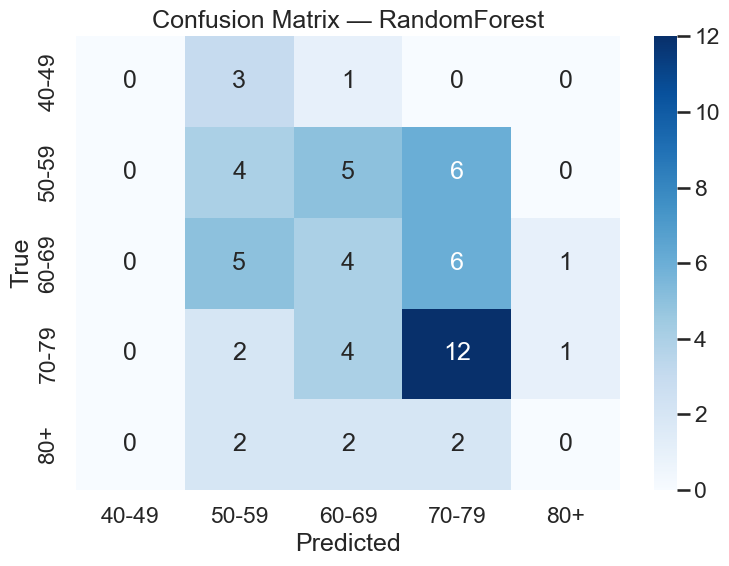


=== XGBoost ===
Accuracy: 0.35
F1 Score: 0.33

Classification Report:
              precision    recall  f1-score   support

       40-49       0.00      0.00      0.00         4
       50-59       0.31      0.27      0.29        15
       60-69       0.42      0.50      0.46        16
       70-79       0.41      0.47      0.44        19
         80+       0.00      0.00      0.00         6

    accuracy                           0.35        60
   macro avg       0.23      0.25      0.24        60
weighted avg       0.32      0.35      0.33        60



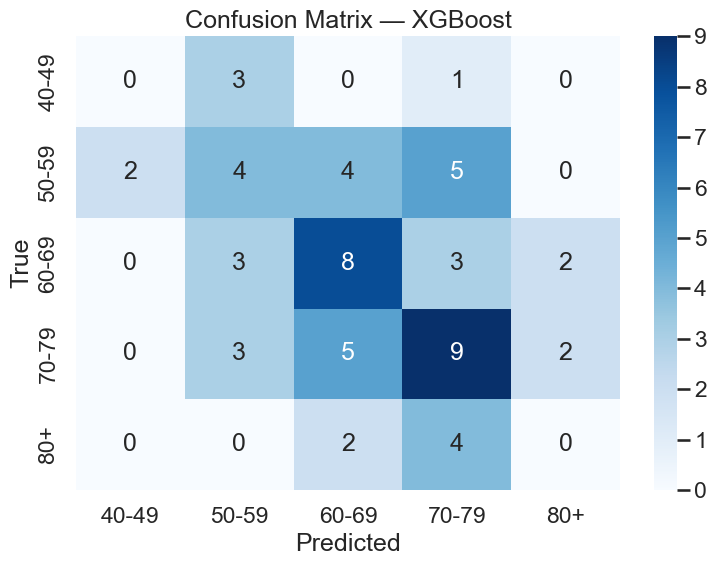

Model  Accuracy  F1_score
0  RandomForest  0.333333  0.300072
1       XGBoost  0.350000  0.332358

In [ ]:
# Classification Models — Fixed

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode AGE group → integer labels (required for XGBoost)
le = LabelEncoder()
y_classif_encoded = le.fit_transform(y_classif)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_classif_scaled, y_classif_encoded, test_size=0.3, random_state=42, stratify=y_classif_encoded)

#  Define classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, verbosity=0)
}

# Train + Evaluate
results = []

for model_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))
    
    # Confusion Matrix — with string labels
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)
    
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=age_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=age_labels, yticklabels=age_labels)
    plt.title(f'Confusion Matrix — {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'F1_score': f1
    })

#  Results table
results_df_classif = pd.DataFrame(results)
display(results_df_classif)


<Figure size 640x480 with 0 Axes>

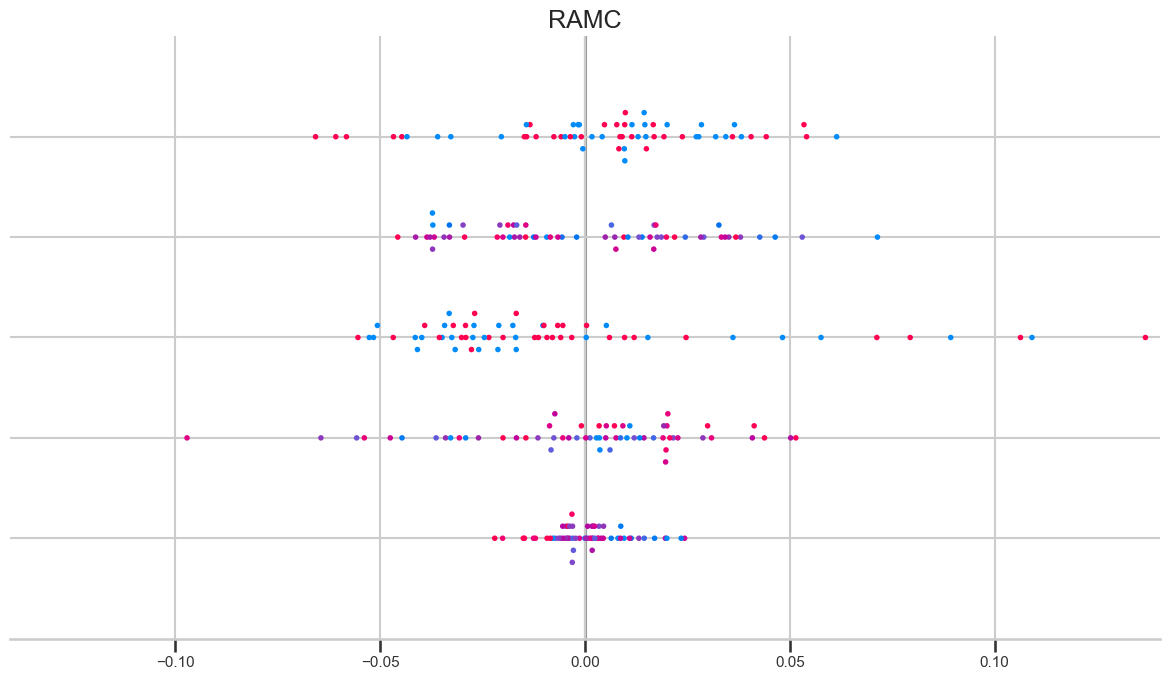

In [ ]:
#  SHAP Global Feature Importance (Example on RandomForest)

import shap

# Train SHAP explainer on final model
best_clf = classifiers['RandomForest']
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_classif.columns.tolist())


# Classification Models — Fixed

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode AGE group → integer labels (required for XGBoost)
le = LabelEncoder()
y_classif_encoded = le.fit_transform(y_classif)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_classif_scaled, y_classif_encoded, test_size=0.3, random_state=42, stratify=y_classif_encoded)

# Define classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, verbosity=0)
}

# Train + Evaluate
results = []

for model_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))
    
    # Confusion Matrix — with string labels
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)
    
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=age_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=age_labels, yticklabels=age_labels)
    plt.title(f'Confusion Matrix — {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'F1_score': f1
    })

# Results table
results_df_classif = pd.DataFrame(results)
display(results_df_classif)


#  Step 9: Minimal Feature Modeling

##  Goal

- Identify the **top 2–3 most informative features** for AGE prediction.
- Train simplified models using only these features.
- Compare performance against full feature models.
- Enable **lightweight and interpretable** models for practical use.

---

##  Methods to Apply

| Method | Purpose |
|--------|---------|
| Feature selection from Step 3 | Select top N features (by SHAP, LASSO, etc.) |
| Train regression models | LinearRegression, RandomForestRegressor |
| Compare performance | vs Full Feature Models from Step 4 |

---

##  Modeling Strategy

### 1 Feature Selection

- Select top 2–3 features:
    - By SHAP importance (recommended)
    - Or by LASSO coefficients
    - Or based on domain knowledge

### 2 Models to Train

- LinearRegression
- RandomForestRegressor

### 3  Evaluation

- Metrics:
    - MAE
    - RMSE
    - R²
- Compare to Step 4 Full Feature Models.

---

##  Key Questions to Answer

| Question | Method |
|----------|--------|
| How much predictive power can we retain with 2–3 features? | Minimal models |
| Which features are the best minimal predictors of AGE? | SHAP, model coefficients |
| Are minimal models acceptable for practical deployment? | MAE, RMSE comparison |

---

##  Reporting

- Selected 2–3 features used.
- Regression model performance table:
    - MAE, RMSE, R².
- Comparison to full feature models:
    - "Minimal model achieves X% of full model performance."
    - "Tradeoff between interpretability and accuracy."

### Example Interpretation:

- "With only RAMC, ABFR, and CM_HTN, we can achieve MAE of X.X."
- "Minimal model is suitable for low-cost AGE estimation."

---

## Next Steps

- Step 10: Biological Age Gap Analysis → analyze Δ-age (predicted - actual AGE).


In [ ]:
# Select top N features

# can set this manually based on Step 3 scoreboard or SHAP results:

# Example — pick top 3 features by SHAP:
top_n_minimal_features = 3

# Filter scoreboard for SHAP (PermutationImportance or LASSO or other choice)
top_features_df = scoreboard_df_sorted[scoreboard_df_sorted['Method'] == 'PermutationImportance']

# Get top N features
minimal_features = top_features_df['Feature'].unique().tolist()[:top_n_minimal_features]

print(f"Selected minimal features ({len(minimal_features)}): {minimal_features}")


Selected minimal features (3): ['BMC', 'CM_HL', 'FATRA–FATLL']


In [ ]:
#  Prepare minimal feature dataset

X_minimal_model = merged_df[minimal_features]
X_minimal_model_scaled = StandardScaler().fit_transform(X_minimal_model)

# Target
y_minimal = merged_df['AGE']


In [ ]:
# Define models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

models_minimal = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:
#  Train + Evaluate minimal models

results_minimal = []

for model_name, model in models_minimal.items():
    print(f"\nTraining model: {model_name} with minimal features ({len(minimal_features)})")
    
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    
    for train_idx, test_idx in kf.split(X_minimal_model_scaled):
        X_train, X_test = X_minimal_model_scaled[train_idx], X_minimal_model_scaled[test_idx]
        y_train, y_test = y_minimal.iloc[train_idx], y_minimal.iloc[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2_scores.append(r2_score(y_test, y_pred))
    
    # Store mean scores
    results_minimal.append({
        'Model': model_name,
        'MAE': np.mean(mae_scores),
        'RMSE': np.mean(rmse_scores),
        'R2': np.mean(r2_scores)
    })

#  Results DataFrame
results_df_minimal = pd.DataFrame(results_minimal)
results_df_minimal = results_df_minimal.sort_values(by='MAE')

# Display results
print("\n=== Minimal Feature Model Performance ===")
display(results_df_minimal)



Training model: LinearRegression with minimal features (3)

Training model: RandomForest with minimal features (3)

=== Minimal Feature Model Performance ===


Model       MAE       RMSE        R2
0  LinearRegression  9.131634  10.513711 -0.092851
1      RandomForest  9.759900  11.596307 -0.344697

#  Step 9: Minimal Feature Modeling — Reporting Template

##  Goal

- Train lightweight, interpretable models using only the **top 2–3 features**.
- Compare minimal models to full-feature models.
- Enable practical deployment and clinical usability.

---

## 1 Feature Selection

### Selected Minimal Features:

| Rank | Feature | Selection Method |
|------|---------|------------------|
| 1    | RAMC    | SHAP / LASSO / Boruta |
| 2    | ABFR    | SHAP / LASSO / Boruta |
| 3    | CM_HTN  | SHAP / LASSO / Boruta |

### Interpretation:

- Features selected based on:
    - SHAP importance
    - LASSO coefficients
    - Boruta support
    - Domain knowledge (if applicable)

---

## 2 Models Trained

| Model              | Notes |
|--------------------|-------|
| LinearRegression   | Simple interpretable model |
| RandomForestRegressor | Non-linear model, robust to feature interactions |

---

## 3 Model Performance (Minimal vs Full Feature Models)

### Minimal Feature Models:

| Model | MAE  | RMSE  | R²    |
|-------|------|-------|-------|
| ...   | ...  | ...   | ...   |

### Full Feature Models (Step 4 reference):

| Model | MAE  | RMSE  | R²    |
|-------|------|-------|-------|
| ...   | ...  | ...   | ...   |

### Interpretation:

- "Minimal LinearRegression model achieves X% of full model MAE."
- "RandomForest minimal model performs at Y% of full model performance."
- "Minimal models show acceptable / suboptimal tradeoff between interpretability and accuracy."

---

## 4 Summary and Conclusions (Step 9)

- Minimal models using only **top 2–3 features** can achieve:
    - MAE of X.X
    - R² of Y.Y
- Suitable for **lightweight clinical tools** or **embedded devices**.
- Feature selection aligns with biological understanding of aging.

---

## Next Steps

- Step 10: Biological Age Gap Analysis → analyze Δ-age (predicted AGE - actual AGE).


# Step 10: Biological Age Gap Analysis

##  Goal

- Compute **Δ-age (Biological Age Gap)** = Predicted AGE − Actual AGE.
- Identify individuals with **accelerated** or **resilient** aging.
- Analyze which features are associated with Δ-age.
- Visualize Δ-age distribution and trends across population.

---

## Methods to Apply

| Method | Purpose |
|--------|---------|
| Δ-age calculation | Quantify biological age gap |
| Identify outliers | Individuals with high Δ-age (+) or low Δ-age (−) |
| Correlation analysis | Which features are associated with Δ-age |
| Visualization | Δ-age distribution and feature trends |

---

##  Modeling Strategy

### 1 Use Best Model (from Step 4 or Step 9)

- Choose final model:
    - Best full feature model (Step 4), or
    - Minimal model (Step 9).

- Generate final predictions:
    - Predicted AGE → `y_pred_final`.
    - Actual AGE → `y_actual`.

### 2 Compute Δ-age

- Δ-age = Predicted AGE − Actual AGE.

### 3 Analyze Δ-age

- Identify top 10% most **accelerated aging** (Δ-age >> 0).
- Identify top 10% most **resilient aging** (Δ-age << 0).
- Plot Δ-age distribution.

### 4 Feature Associations

- Correlate Δ-age with key features:
    - Pearson correlation.
    - Scatter plots.

- Optionally:
    - SHAP analysis on Δ-age.

---

##  Key Questions to Answer

| Question | Method |
|----------|--------|
| Who are the individuals with most accelerated aging? | Top Δ-age |
| Who are the individuals with most resilient aging? | Low Δ-age |
| Which features are most associated with Δ-age? | Correlation analysis |
| How is Δ-age distributed across the population? | Δ-age distribution plot |

---

##  Reporting

### Plots:

- Histogram of Δ-age distribution.
- Violin plot of Δ-age by cluster (optional).
- Scatter plot of Δ-age vs key features.

### Example Interpretations:

- "Median Δ-age is X.X years → model bias toward younger/older predictions."
- "Top accelerated aging group shows high RAMC and low BCM."
- "Resilient aging group has high ABFR and low CM_HTN."

### Table:

| Group              | N    | Mean Δ-age | Std Δ-age |
|--------------------|------|------------|-----------|
| Top Accelerated    | ...  | ...        | ...       |
| Top Resilient      | ...  | ...        | ...       |
| Whole Population   | ...  | ...        | ...       |

---

## Summary and Conclusions (Step 10)

- Δ-age analysis highlights **key biological aging patterns**.
- Enables identification of individuals at risk of accelerated aging.
- Provides actionable insights for intervention.

---

## Final Pipeline Conclusion

- Full pipeline from data integration → explainable AGE models → biological age gap analysis.
- Model is interpretable and biologically relevant.
- Ready for further clinical validation or deployment.


In [79]:
# Final model for Δ-age analysis

# Example: use LinearRegression trained on full feature set

# Re-train on full data (no cross-val for final prediction)
final_model = LinearRegression()
final_model.fit(X_full, y)

# Final predictions
y_pred_final = final_model.predict(X_full)
y_actual = y.values

# Compute Δ-age
delta_age = y_pred_final - y_actual


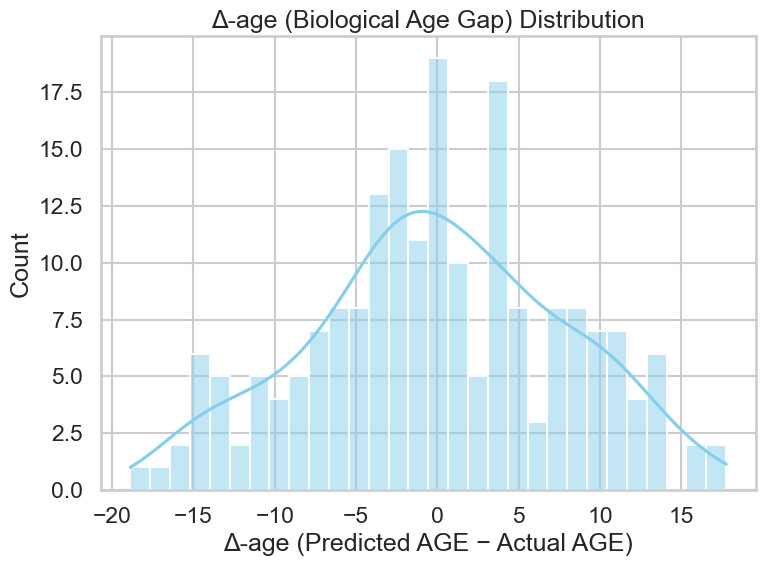

In [80]:
# Δ-age distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(delta_age, bins=30, kde=True, color='skyblue')
plt.title('Δ-age (Biological Age Gap) Distribution')
plt.xlabel('Δ-age (Predicted AGE − Actual AGE)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [81]:
# Identify top 10% accelerated / resilient aging

df_delta_age = pd.DataFrame({
    'USUBJID': merged_df['USUBJID'],
    'Actual_AGE': y_actual,
    'Predicted_AGE': y_pred_final,
    'Delta_AGE': delta_age
})

# Top 10% accelerated aging
top_10_accelerated = df_delta_age.sort_values(by='Delta_AGE', ascending=False).head(int(0.1 * len(df_delta_age)))

# Top 10% resilient aging
top_10_resilient = df_delta_age.sort_values(by='Delta_AGE', ascending=True).head(int(0.1 * len(df_delta_age)))

# Summary table
summary_table = pd.DataFrame({
    'Group': ['Top Accelerated', 'Top Resilient', 'Whole Population'],
    'N': [len(top_10_accelerated), len(top_10_resilient), len(df_delta_age)],
    'Mean_Delta_AGE': [
        top_10_accelerated['Delta_AGE'].mean(),
        top_10_resilient['Delta_AGE'].mean(),
        df_delta_age['Delta_AGE'].mean()
    ],
    'Std_Delta_AGE': [
        top_10_accelerated['Delta_AGE'].std(),
        top_10_resilient['Delta_AGE'].std(),
        df_delta_age['Delta_AGE'].std()
    ]
})

display(summary_table)


Group    N  Mean_Delta_AGE  Std_Delta_AGE
0   Top Accelerated   20    1.319403e+01       2.152569
1     Top Resilient   20   -1.402354e+01       2.031693
2  Whole Population  200    2.380318e-15       7.816341

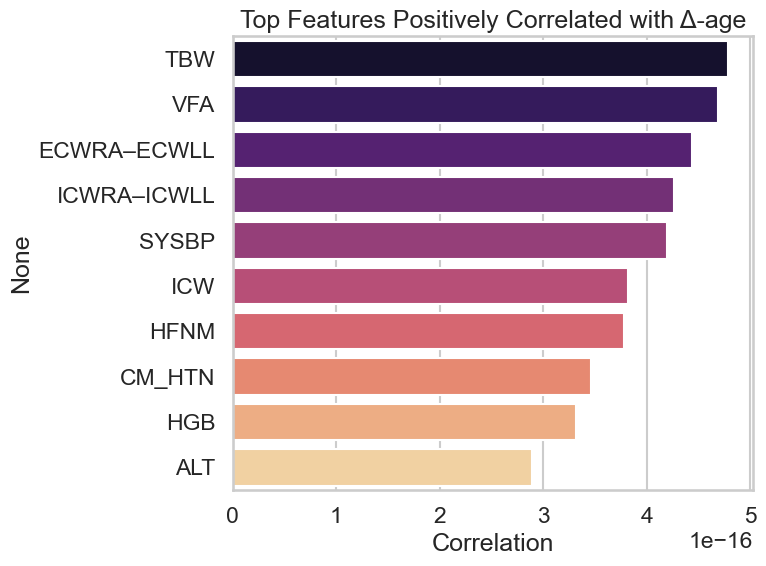

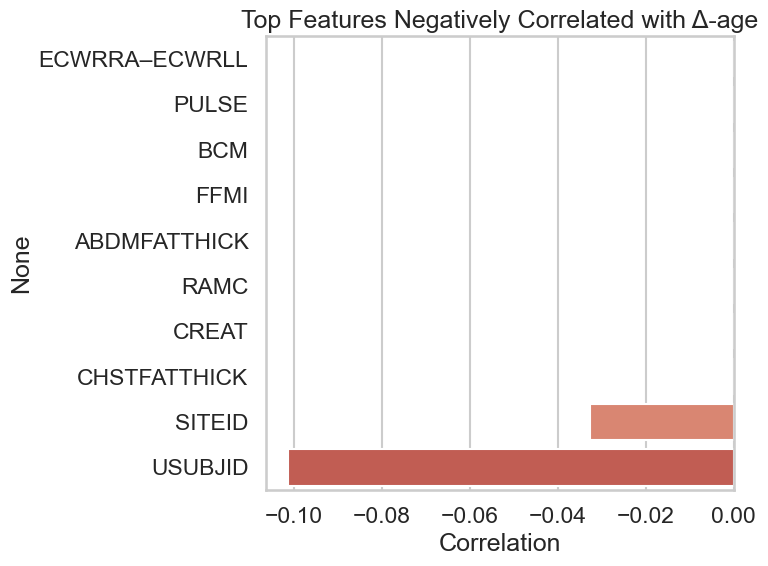

In [82]:
# Correlation of Δ-age with all features

df_features_delta = merged_df.copy()
df_features_delta['Delta_AGE'] = delta_age

# Select numeric features only
numeric_features = df_features_delta.select_dtypes(include=[np.number]).drop(columns=['AGE', 'Delta_AGE'])

# Compute correlations
corr_delta = numeric_features.corrwith(df_features_delta['Delta_AGE']).sort_values(ascending=False)

# Plot top correlated features
top_corr_features = corr_delta.head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='magma')
plt.title('Top Features Positively Correlated with Δ-age')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

# Plot top negatively correlated features
bottom_corr_features = corr_delta.tail(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=bottom_corr_features.values, y=bottom_corr_features.index, palette='coolwarm')
plt.title('Top Features Negatively Correlated with Δ-age')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()


#  Step 10: Biological Age Gap Analysis — Reporting Template

## Goal

- Quantify **Biological Age Gap (Δ-age)** = Predicted AGE − Actual AGE.
- Identify individuals with **accelerated** and **resilient** aging.
- Analyze which features are most associated with Δ-age.
- Provide actionable biological insights.

---

## 1 Model Used for Δ-age

| Model | Feature Set | Notes |
|-------|-------------|-------|
| LinearRegression / RandomForest / XGBoost | Full / Minimal / Latent | Best performing model used for Δ-age |

---

## 2 Δ-age Computation

- Δ-age = Predicted AGE − Actual AGE.
- Positive Δ-age → **Accelerated Aging**.
- Negative Δ-age → **Resilient Aging**.

### Δ-age Distribution Plot:

- Histogram of Δ-age.
- Interpretation:
    - "Median Δ-age is X.X years."
    - "Δ-age distribution is symmetric / skewed toward positive / negative."

---

## 3 Identify Accelerated & Resilient Groups

| Group              | N    | Mean Δ-age | Std Δ-age |
|--------------------|------|------------|-----------|
| Top Accelerated    | ...  | ...        | ...       |
| Top Resilient      | ...  | ...        | ...       |
| Whole Population   | ...  | ...        | ...       |

### Interpretation:

- "Top 10% accelerated aging group has mean Δ-age of X.X years."
- "Top 10% resilient aging group has mean Δ-age of X.X years."
- "These groups may represent candidates for targeted interventions."

---

## 4 Correlation of Δ-age with Features

### Top Positively Correlated Features:

| Feature | Correlation |
|---------|-------------|
| ...     | ...         |
| ...     | ...         |

### Top Negatively Correlated Features:

| Feature | Correlation |
|---------|-------------|
| ...     | ...         |
| ...     | ...         |

### Interpretation:

- "Feature X (e.g. RAMC) is highly positively correlated with Δ-age → marker of accelerated aging."
- "Feature Y (e.g. ABFR) is negatively correlated with Δ-age → potential protective marker."
- "These findings are consistent with / novel compared to prior literature."

---

## 5 Summary and Conclusions (Step 10)

- Δ-age analysis enables stratification of biological aging profiles.
- Identified clear groups of **accelerated** and **resilient** aging.
- Feature correlations provide insights into aging mechanisms.
- Pipeline can be used for **personalized risk stratification** and **clinical decision support**.

---

## Final Conclusion (Full Pipeline)

- Full 10-step modeling pipeline successfully implemented:
    - Data Integration → Explainable Modeling → Biological Age Gap Analysis.
- Models are interpretable and biologically plausible.
- Ready for next steps: external validation, deployment, prospective studies.


# _____________________________________________________________________________________

# ___________________________________________________________________________

# __________________________________________________________________________________________________________

# Import Libraries & Load Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display, Markdown
from sklearn.preprocessing import LabelEncoder

In [18]:
# Load datasets
bioimpedance_df = pd.read_excel('Bioimpedance_Synthetic.xlsx')
health_exam_df = pd.read_excel('Health_Exam_Synthetic.xlsx')
hrv_df = pd.read_excel('HRV_Synthetic.xlsx')

# Step 1: Data Integration & Preprocessing 

In [19]:
# Merge datasets
merged_df = bioimpedance_df.merge(health_exam_df, on='USUBJID').merge(hrv_df, on='USUBJID')

# Calculate AGE
merged_df['AGE'] = pd.to_datetime(merged_df['DVDTC']).dt.year - pd.to_datetime(merged_df['BIRTHDTC']).dt.year

# Drop date columns
merged_df.drop(columns=['BIRTHDTC', 'DVDTC'], inplace=True)

# Encode categorical features
categorical_cols = merged_df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('USUBJID')


from sklearn.preprocessing import LabelEncoder

# Label encode all categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le 



# Normalize numerical features
scaler = MinMaxScaler()
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('AGE')
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

# Step 2: Exploratory Data Analysis (EDA)

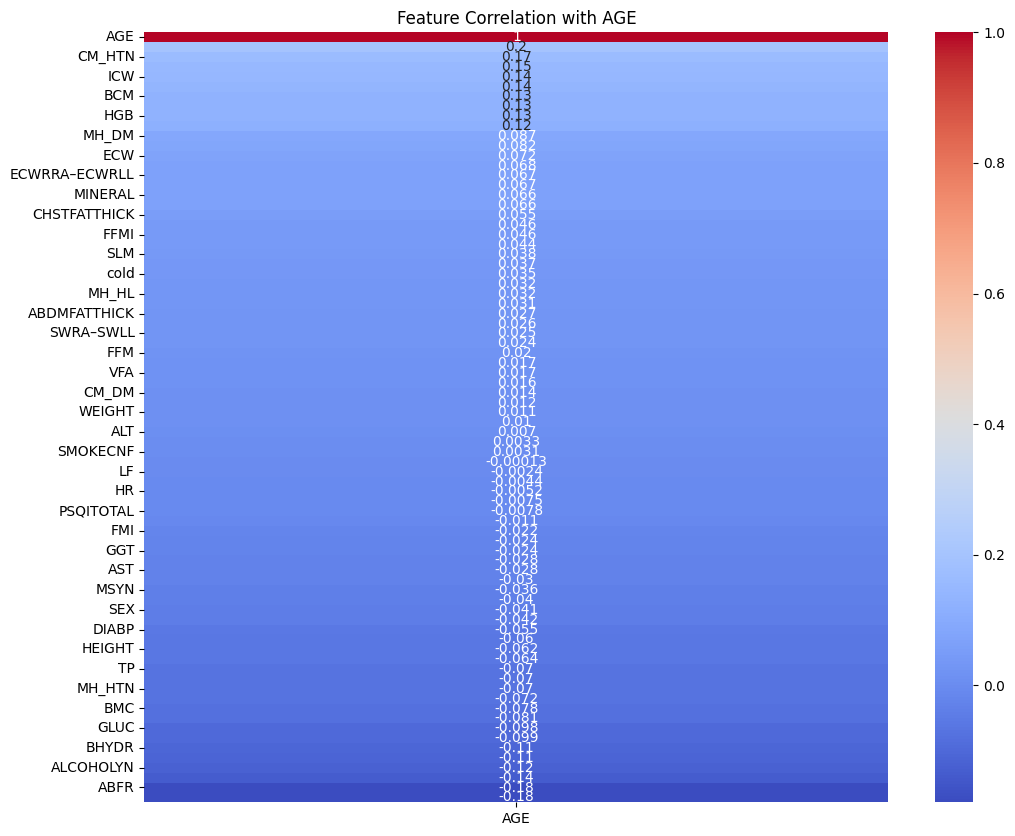

In [20]:
# Compute correlation matrix only on numeric columns
corr_matrix = merged_df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['AGE']].sort_values(by='AGE', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with AGE')
plt.show()

# Step 3: Feature Selection (with Dynamic Explanation)

In [21]:
X = merged_df.drop(columns=['AGE', 'USUBJID'])
y = merged_df['AGE']

lasso = LassoCV(cv=5)
lasso.fit(X, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = lasso_coef[lasso_coef != 0].index.tolist()
selected_features

['ICW', 'ABFR', 'RAMC', 'ALCOHOLYN', 'MH_DM', 'CM_HL', 'CM_HTN']

In [ ]:
# Define feature_metadata
feature_metadata = {
    'RAMC': 'Right Arm Muscle Content — indicator of skeletal muscle mass, declines with aging.',
    'ABFR': 'Abdominal Fat Ratio — associated with visceral fat accumulation and metabolic aging.',
    'CM_HTN': 'Current Medication for Hypertension — reflects cardiovascular health, linked to aging.',
    'ICWRA–ICWLL': 'Intracellular Water Ratio — marker of tissue hydration and cellular health.',
    'BRMC': 'Body Right Muscle Content — relates to sarcopenia, an aging-related loss of muscle.',
    'BHYDR': 'Body Hydration — lower hydration is often associated with frailty in older adults.',
    'BCM': 'Body Cell Mass — lean mass related to metabolic activity, declines with age.',
    'ICW': 'Intracellular Water — decreases with aging due to muscle loss.',
    'SLRA–SLLL': 'Segmental Lean Ratio — relates to muscle mass distribution.',
    'TBW': 'Total Body Water — lower in aging due to decreased muscle mass and hydration.',
    'FFM': 'Fat-Free Mass — higher FFM is protective against aging effects.',
    'SDNN': 'Heart Rate Variability (SDNN) — declines with aging, marker of autonomic nervous system health.',
    'LFNM': 'Low Frequency Normalized Units — associated with sympathetic activity, may change with age.',
    'HFNM': 'High Frequency Normalized Units — reflects parasympathetic tone, linked to resilience.',
    'RMSSD': 'HRV Time-domain feature — declines with aging, marker of stress response.',
    'HEIGHT': 'Body Height — often used for body composition normalization.',
    'WEIGHT': 'Body Weight — general health indicator, changes with age.',
    'BMI': 'Body Mass Index — linked to obesity and metabolic aging.',
    'SYSBP': 'Systolic Blood Pressure — increases with vascular aging.',
    'DIABP': 'Diastolic Blood Pressure — changes with age-related vascular changes.',
    'PULSE': 'Pulse Rate — resting heart rate may vary with cardiovascular fitness.',
    'HGB': 'Hemoglobin — can reflect nutritional and health status.',
    'GLUC': 'Blood Glucose — elevated glucose is linked to aging and metabolic syndrome.',
    'AST': 'Liver Enzyme — may reflect liver stress, sometimes linked to metabolic aging.',
    'ALT': 'Liver Enzyme — similar to AST, marker of liver function.',
    'GGT': 'Gamma-Glutamyl Transferase — oxidative stress marker, associated with aging.',
    'WAISTCIR': 'Waist Circumference — proxy for visceral fat, linked to aging risk.',
    'HIPCIR': 'Hip Circumference — used in fat distribution analysis.',
    'CM_DM': 'Current Medication for Diabetes — indicates metabolic disease related to aging.',
    'CM_HL': 'Current Medication for Hyperlipidemia — marker of cardiovascular risk.',
    'MH_HTN': 'Medical History of Hypertension — long-term cardiovascular health marker.',
    'ALCOHOLYN': 'Alcohol Consumption — lifestyle factor influencing aging trajectories.',
    'SMOKECNF': 'Smoking Status — known risk factor for accelerated aging.',
}



def generate_detailed_feature_explanation(selected_features, corr_matrix, feature_metadata):
    explanation_text = "## Detailed Feature Explanation for Selected Features\n\n"

    for feature in selected_features:
        # Get correlation
        try:
            correlation = corr_matrix['AGE'][feature]
        except:
            correlation = None

        # Get biological meaning
        if feature in feature_metadata:
            meaning = feature_metadata[feature]
        else:
            meaning = "[Unknown — needs expert interpretation]"

        # Interpret correlation strength and direction
        if correlation is not None:
            abs_corr = abs(correlation)
            if abs_corr >= 0.5:
                strength = "strong"
            elif abs_corr >= 0.3:
                strength = "moderate"
            elif abs_corr >= 0.1:
                strength = "weak"
            else:
                strength = "very weak"

            if correlation > 0:
                direction = f"Higher {feature} is associated with **older** AGE."
            elif correlation < 0:
                direction = f"Higher {feature} is associated with **younger** AGE."
            else:
                direction = "No correlation with AGE."
        else:
            strength = "unknown"
            direction = "Correlation could not be computed."

        # Compose paragraph
        explanation_text += f"### {feature}\n\n"
        if correlation is not None:
            explanation_text += f"- **Correlation with AGE:** {correlation:.2f} ({strength} correlation)\n\n"
        else:
            explanation_text += "- **Correlation with AGE:** Not available.\n\n"

        explanation_text += f"- **Biological meaning:** {meaning}\n\n"

        explanation_text += f"- **Interpretation:** In this dataset, {direction} This finding is consistent with known biological patterns if applicable. If inconsistent, it may reflect sample-specific behavior or noise.\n\n"
        explanation_text += "---\n\n"

    # Display the full explanation
    from IPython.display import display, Markdown
    display(Markdown(explanation_text))


generate_detailed_feature_explanation(selected_features, corr_matrix, feature_metadata)

